В качестве прокта по машинному обучению нужно помочь фермеру владльцу «Вольный луг» купить буренок из «ЭкоФерма», при этом каждая буренка должна давать не меньше 6000 килиграмм молока в год а надогй должен быть вкусным по критериям фермера.
В качестве решения нужно разработать модель машинного обучения которая поможет управлять рисками и принимать обьективное решение о покупке.
Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.
В качестве этапов работы над проектом:
1) Загрузка данных
2) Предобработка данных
3) Исследовательский анализ данных
4) Корреляционный анализ
5) Бучение модели линейной регрессии
6) Обучение модели логичтической регресии
7) Итоговый вывод

# 1 Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import precision_recall_curve


<div class="alert alert-success">
<b>👍 Успех:</b> Импортированы нужные библиотеки!
</div>

In [2]:
ferma = pd.read_csv('/datasets/ferma_main.csv',sep=';')
ferma.head(5)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [3]:
ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

В первом датафрейме имеется 634 строки с данными на коров фермера. На лицо проблема змеимено регистра столбцов и неправильного типа данных в столбцах ЭКЕ (float), СПО (float), жирность (float),белок (float) 

In [4]:
ferma.columns = ferma.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
ferma.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро_протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
columns_to_convert = ['эке_(энергетическая_кормовая_единица)', 'спо_(сахаро_протеиновое_соотношение)', 
                      'жирность,%', 'белок,%']
for col in columns_to_convert:
    # Сначала преобразуем в строку, если это еще не строка
    ferma[col] = ferma[col].astype(str)
    # Затем заменяем запятые на точки и преобразуем в float
    ferma[col] = ferma[col].str.replace(',', '.').astype(float)
ferma.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   удой,_кг                               634 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  634 non-null    float64
 3   сырой_протеин,_г                       634 non-null    int64  
 4   спо_(сахаро_протеиновое_соотношение)   634 non-null    float64
 5   порода                                 634 non-null    object 
 6   тип_пастбища                           634 non-null    object 
 7   порода_папы_быка                       634 non-null    object 
 8   жирность,%                             634 non-null    float64
 9   белок,%                                634 non-null    float64
 10  вкус_молока                            634 non-null    object 
 11  возрас

Столбцы исправленны, тип данных исправлен

In [6]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
ferma_dad.columns = ferma_dad.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Можно заменить что тут 629 строк а в первом 634 разница в 5 строк. надо проверить 634 уникальныз или нет id в следующем этапе

In [8]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [9]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Также как и впервом нужно исправить регистр столбцов и перевести тип текущей джирности и белка во float


In [10]:
cow_buy.columns = cow_buy.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [11]:
columns_to_convert2 = ['текущая_жирность,%', 'текущий_уровень_белок,%']
for col in columns_to_convert2:
    # Сначала преобразуем в строку, если это еще не строка
    cow_buy[col] = cow_buy[col].astype(str)
    # Затем заменяем запятые на точки и преобразуем в float
    cow_buy[col] = cow_buy[col].str.replace(',', '.').astype(float)
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Вывод по разделу:
Для анализа представленны три датафрейма первый с 634 строками данным по коровам фермера, второй со 629 строками по отцам коров фермера и третий 20 строк с данынми по коровам для покупок. Названия столбцов приведены к нижнему регистру а также исправленны типы данных в 1 и 3 датафреймах в столбцах с численными знаечниями

# 2 .Предобработка данных

## 2.1 Проверка на пропуски


In [12]:
missing_values1 = ferma.isnull().sum()
print("Пропущенные значения в ferma:\n", missing_values1)
missing_values2 = ferma_dad.isnull().sum()
print("Пропущенные значения в ferma_dad:\n", missing_values2)
missing_values3 = cow_buy.isnull().sum()
print("Пропущенные значения в cow_buy:\n", missing_values3)

Пропущенные значения в ferma:
 id                                       0
удой,_кг                                 0
эке_(энергетическая_кормовая_единица)    0
сырой_протеин,_г                         0
спо_(сахаро_протеиновое_соотношение)     0
порода                                   0
тип_пастбища                             0
порода_папы_быка                         0
жирность,%                               0
белок,%                                  0
вкус_молока                              0
возраст                                  0
dtype: int64
Пропущенные значения в ferma_dad:
 id          0
имя_папы    0
dtype: int64
Пропущенные значения в cow_buy:
 порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64


Что и требовалось доказать нет пропушеных знаечний в данных. Это было видно в предыщем разделе с помощью info()

## 2.2 Проверка на наличие дубликатов

In [13]:
duplicates1 = ferma.duplicated()
print(f"Найдено дубликатов в ferma: {duplicates1.sum()}")
duplicates2 = ferma_dad.duplicated()
print(f"Найдено дубликатов в ferma_dad: {duplicates2.sum()}")
duplicates3 = cow_buy.duplicated()
print(f"Найдено дубликатов в cow_buy: {duplicates3.sum()}")

Найдено дубликатов в ferma: 5
Найдено дубликатов в ferma_dad: 0
Найдено дубликатов в cow_buy: 4


In [14]:
ferma[duplicates1]

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро_протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


В первом датафрейме найдено 5 полных дубликатов id627. нужно их удалить

In [15]:
ferma = ferma.drop_duplicates()
ferma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   удой,_кг                               629 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  629 non-null    float64
 3   сырой_протеин,_г                       629 non-null    int64  
 4   спо_(сахаро_протеиновое_соотношение)   629 non-null    float64
 5   порода                                 629 non-null    object 
 6   тип_пастбища                           629 non-null    object 
 7   порода_папы_быка                       629 non-null    object 
 8   жирность,%                             629 non-null    float64
 9   белок,%                                629 non-null    float64
 10  вкус_молока                            629 non-null    object 
 11  возрас

Отлично теперь первый и второй датафрейм идеют одинаковое коллчиство их можно будет обьединять

In [16]:
cow_buy[duplicates3]

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Полные дубликаты найдены и удалены. Логично проверить наличие неявных дубликатов  впервых двух дафреймов по id


In [18]:
if 'id' in ferma.columns:
    id_duplicates = ferma.duplicated(subset=['id'])
    print(f"Найдено {id_duplicates.sum()} дубликатов ID")

Найдено 0 дубликатов ID


In [19]:
if 'id' in ferma_dad.columns:
    id_duplicates = ferma_dad.duplicated(subset=['id'])
    print(f"Найдено {id_duplicates.sum()} дубликатов ID")

Найдено 0 дубликатов ID


## 2.3 Поиск неявных дубликатов

In [20]:
ferma['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [21]:
ferma['тип_пастбища'] = ferma['тип_пастбища'].str.replace('Равнинные', 'Равнинное').str.lower()

In [22]:
ferma['тип_пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [23]:
ferma['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [24]:
ferma['порода_папы_быка'] = ferma['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

In [25]:
ferma['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [26]:
cow_buy['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [27]:
ferma['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Вывод по разделу:
В данном раздела была произведена проверка на пропуски которых не оказалось и на будикаты. Было найдено 5 полных дубликатов в датафрейме ferma и 5 в cow_buy. Также была произведена проверка на неявные дубликаты по столбку id в первом и втором датафреме, дубликаты не были найдены. Произведен поиск и замена неявных дубликатов в категориальных переменных.Замена типа данных была произведена в первом разедле так как она сильно бросилась в галаз при первичном анализе не заню критично ли это.

# 3.Исследовательский анализ данных


══════════════════════════════════════════════════
1. Разделение признаков на типы
══════════════════════════════════════════════════

Количественные признаки: ['id', 'удой,_кг', 'эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро_протеиновое_соотношение)', 'жирность,%', 'белок,%']
Категориальные признаки: ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

══════════════════════════════════════════════════
2. АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ
══════════════════════════════════════════════════

Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
"удой,_кг",629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
эке_(энергетическая_кормовая_единица),629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
"сырой_протеин,_г",629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
спо_(сахаро_протеиновое_соотношение),629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
"жирность,%",629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
"белок,%",629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


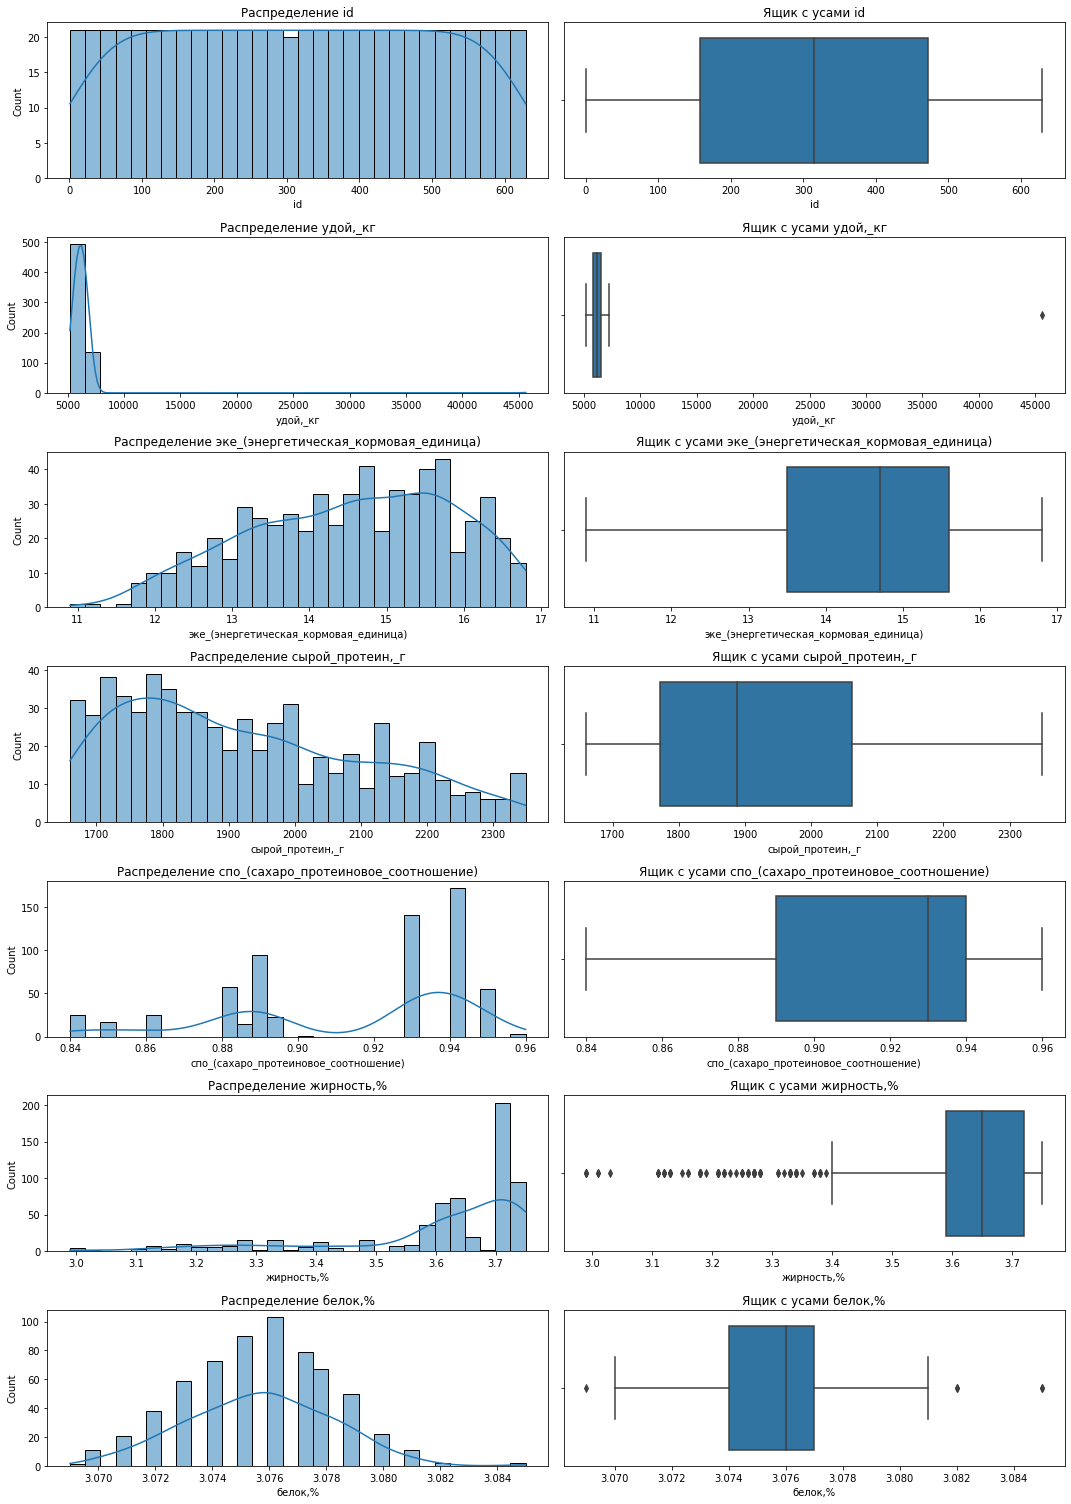


Выбросы (метод IQR):
id: 0 выбросов
удой,_кг: 1 выбросов
эке_(энергетическая_кормовая_единица): 0 выбросов
сырой_протеин,_г: 0 выбросов
спо_(сахаро_протеиновое_соотношение): 0 выбросов
жирность,%: 87 выбросов
белок,%: 5 выбросов

══════════════════════════════════════════════════
3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
══════════════════════════════════════════════════


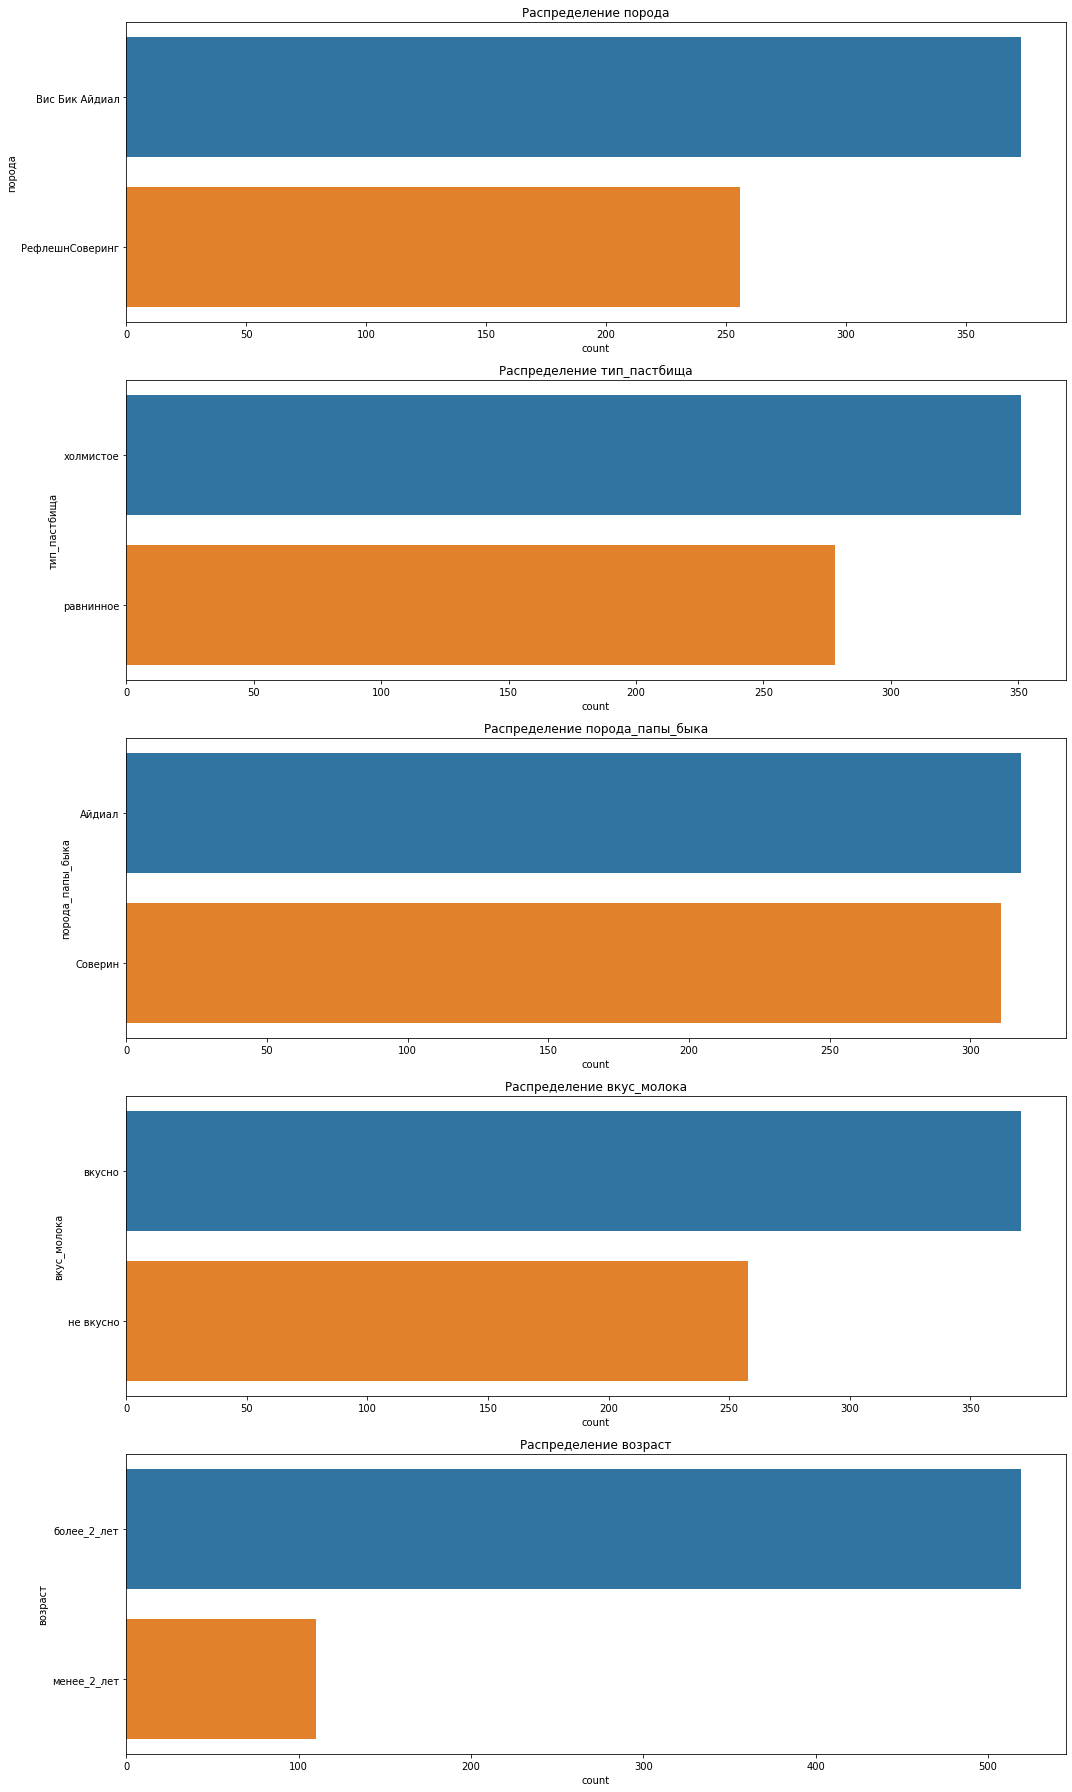

In [28]:
def analys(df):

    # 1. Разделение признаков на типы
    print("\n"+ "═"*50)
    print("1. Разделение признаков на типы")
    print("═"*50)
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    print("\nКоличественные признаки:", list(numeric_cols))
    print("Категориальные признаки:", list(categorical_cols))
    
    # 2. Статистический анализ количественных признаков
    print("\n"+ "═"*50)
    print("2. АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ")
    print("═"*50)
    
    # Описательная статистика
    print("\nОписательная статистика:")
    display(df[numeric_cols].describe().T)
    
    # Визуализация распределений
    plt.figure(figsize=(15, len(numeric_cols)*3))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 2, 2*i-1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Распределение {col}')
        
        plt.subplot(len(numeric_cols), 2, 2*i)
        sns.boxplot(x=df[col])
        plt.title(f'Ящик с усами {col}')
    plt.tight_layout()
    plt.show()
    
    # Проверка на выбросы
    print("\nВыбросы (метод IQR):")
    outliers = {}
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outlier_count
        print(f"{col}: {outlier_count} выбросов")
    
    # 3. Анализ категориальных признаков
    print("\n"+ "═"*50)
    print("3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
    print("═"*50)
    
    plt.figure(figsize=(15, len(categorical_cols)*5))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols), 1, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Распределение {col}')
    plt.tight_layout()
    plt.show()
      
analys(ferma)

присутвует явная аномалия значения удой 45500 удалим ее и повторим


══════════════════════════════════════════════════
1. Разделение признаков на типы
══════════════════════════════════════════════════

Количественные признаки: ['id', 'удой,_кг', 'эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро_протеиновое_соотношение)', 'жирность,%', 'белок,%']
Категориальные признаки: ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

══════════════════════════════════════════════════
2. АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ
══════════════════════════════════════════════════

Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
id,628.0,315.474522,181.475367,1.000,158.750,315.500,472.250,629.000
"удой,_кг",628.0,6125.968153,475.857053,5204.000,5749.750,6132.500,6501.000,7222.000
эке_(энергетическая_кормовая_единица),628.0,14.548726,1.301777,10.900,13.500,14.700,15.600,16.800
"сырой_протеин,_г",628.0,1923.759554,182.832816,1660.000,1771.750,1888.000,2062.250,2349.000
спо_(сахаро_протеиновое_соотношение),628.0,0.913089,0.032221,0.840,0.890,0.930,0.940,0.960
"жирность,%",628.0,3.604268,0.168093,2.990,3.590,3.650,3.720,3.750
"белок,%",628.0,3.075670,0.002551,3.069,3.074,3.076,3.077,3.085


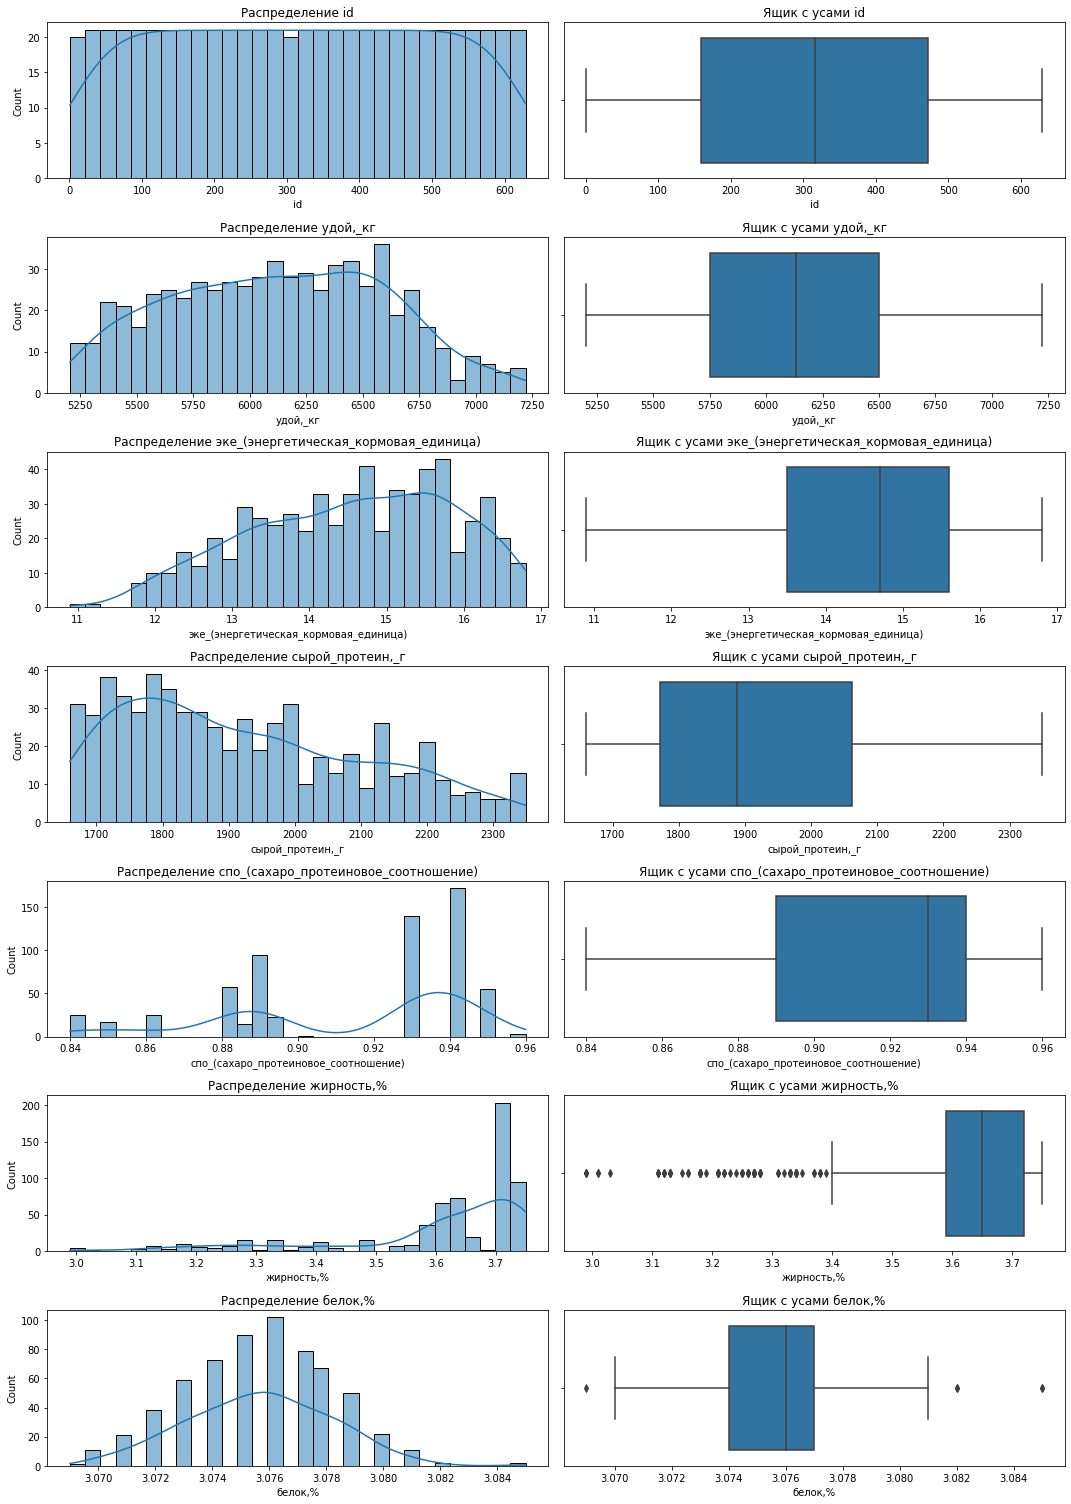


Выбросы (метод IQR):
id: 0 выбросов
удой,_кг: 0 выбросов
эке_(энергетическая_кормовая_единица): 0 выбросов
сырой_протеин,_г: 0 выбросов
спо_(сахаро_протеиновое_соотношение): 0 выбросов
жирность,%: 86 выбросов
белок,%: 5 выбросов

══════════════════════════════════════════════════
3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
══════════════════════════════════════════════════


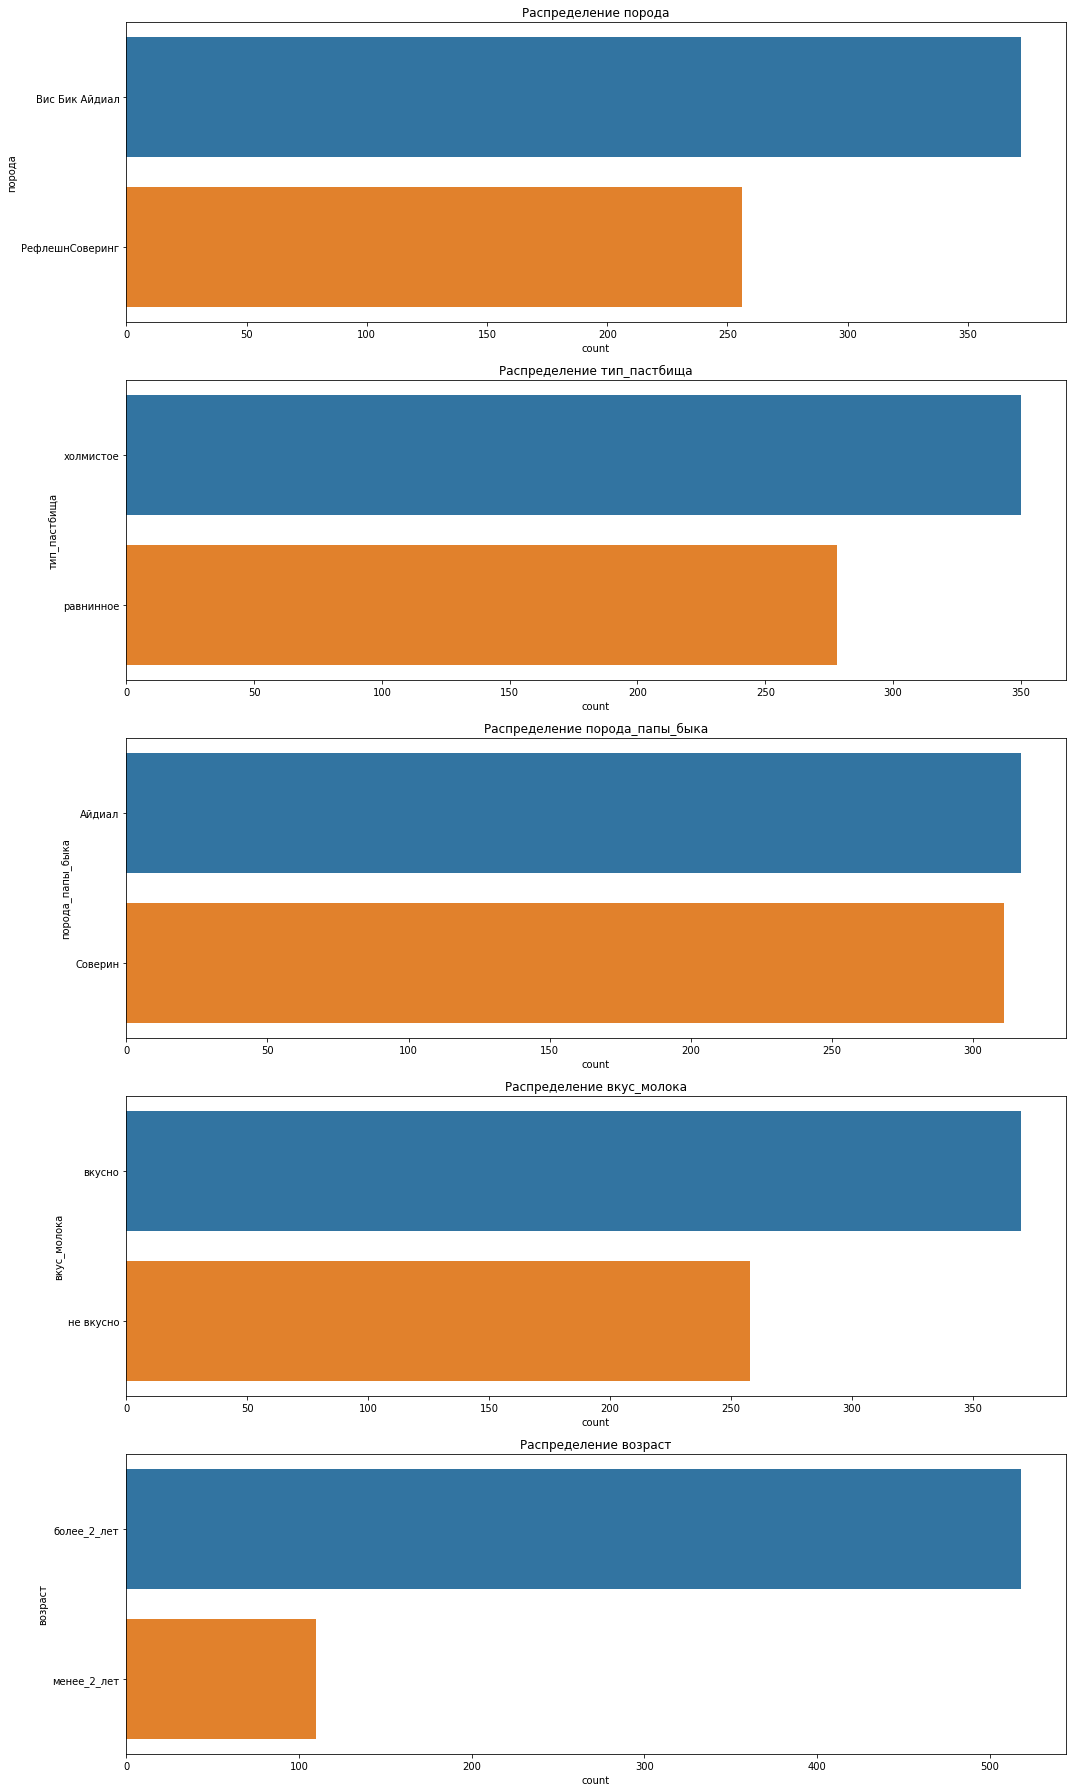

In [29]:
ferma  = ferma[ferma['удой,_кг'] <= 8000]
analys(ferma)



Анализируя данные в ferma можно сделать вывод:
 Колчисетвенные признаки
1)присутсвует выбросы в значении удой 1 знаечние 45500 что лежит далеко за границы усов. явная аномалия которую нужно удалть чтобы не исказился результат анализа. Также имеются вобросы в жирности (87 штук) и белке (5 штук), удалять их нестоит так они появляют на результат в жадьнейшем. Можно увелитить межквартильный размех с 1.5 до 3 тогда они войдут в интервал. Моеждт это связано с возрастом коровы
2) Распределение коллчественых признаков асиметрично кроме белка.
3) Качественные признаки равномерно на две категории кроме возраста, присутвует недостаток данных молодых коров


══════════════════════════════════════════════════
1. Разделение признаков на типы
══════════════════════════════════════════════════

Количественные признаки: ['id']
Категориальные признаки: ['имя_папы']

══════════════════════════════════════════════════
2. АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ
══════════════════════════════════════════════════

Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


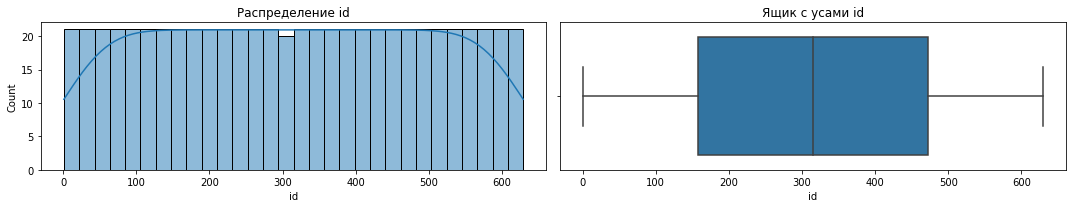


Выбросы (метод IQR):
id: 0 выбросов

══════════════════════════════════════════════════
3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
══════════════════════════════════════════════════


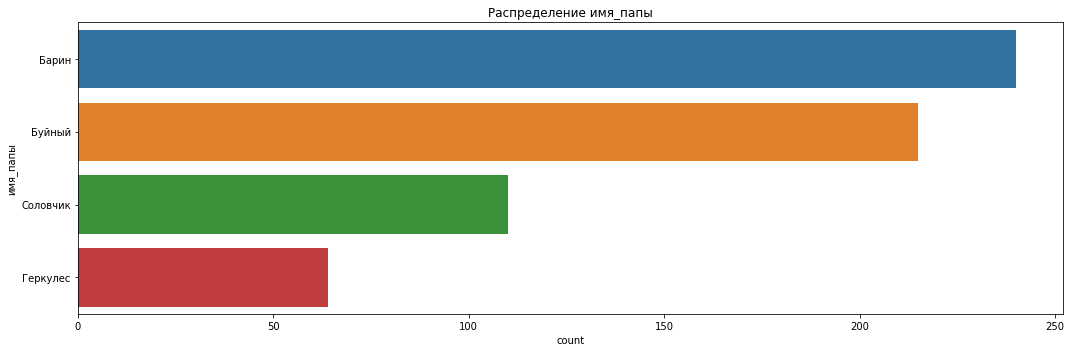

In [30]:
analys(ferma_dad)

В данном датасете распредление отцов коров не ранвомерное Барин и Буйный отличаюся в 2 а то и 4 раза от Соловчика и Геркулеса рождаемостью


══════════════════════════════════════════════════
1. Разделение признаков на типы
══════════════════════════════════════════════════

Количественные признаки: ['текущая_жирность,%', 'текущий_уровень_белок,%']
Категориальные признаки: ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']

══════════════════════════════════════════════════
2. АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ
══════════════════════════════════════════════════

Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
"текущая_жирность,%",20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
"текущий_уровень_белок,%",20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


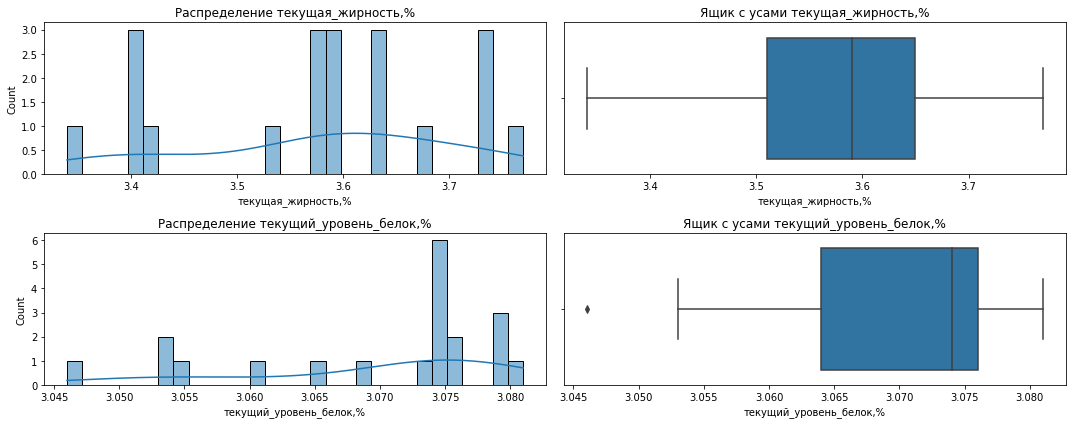


Выбросы (метод IQR):
текущая_жирность,%: 0 выбросов
текущий_уровень_белок,%: 1 выбросов

══════════════════════════════════════════════════
3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
══════════════════════════════════════════════════


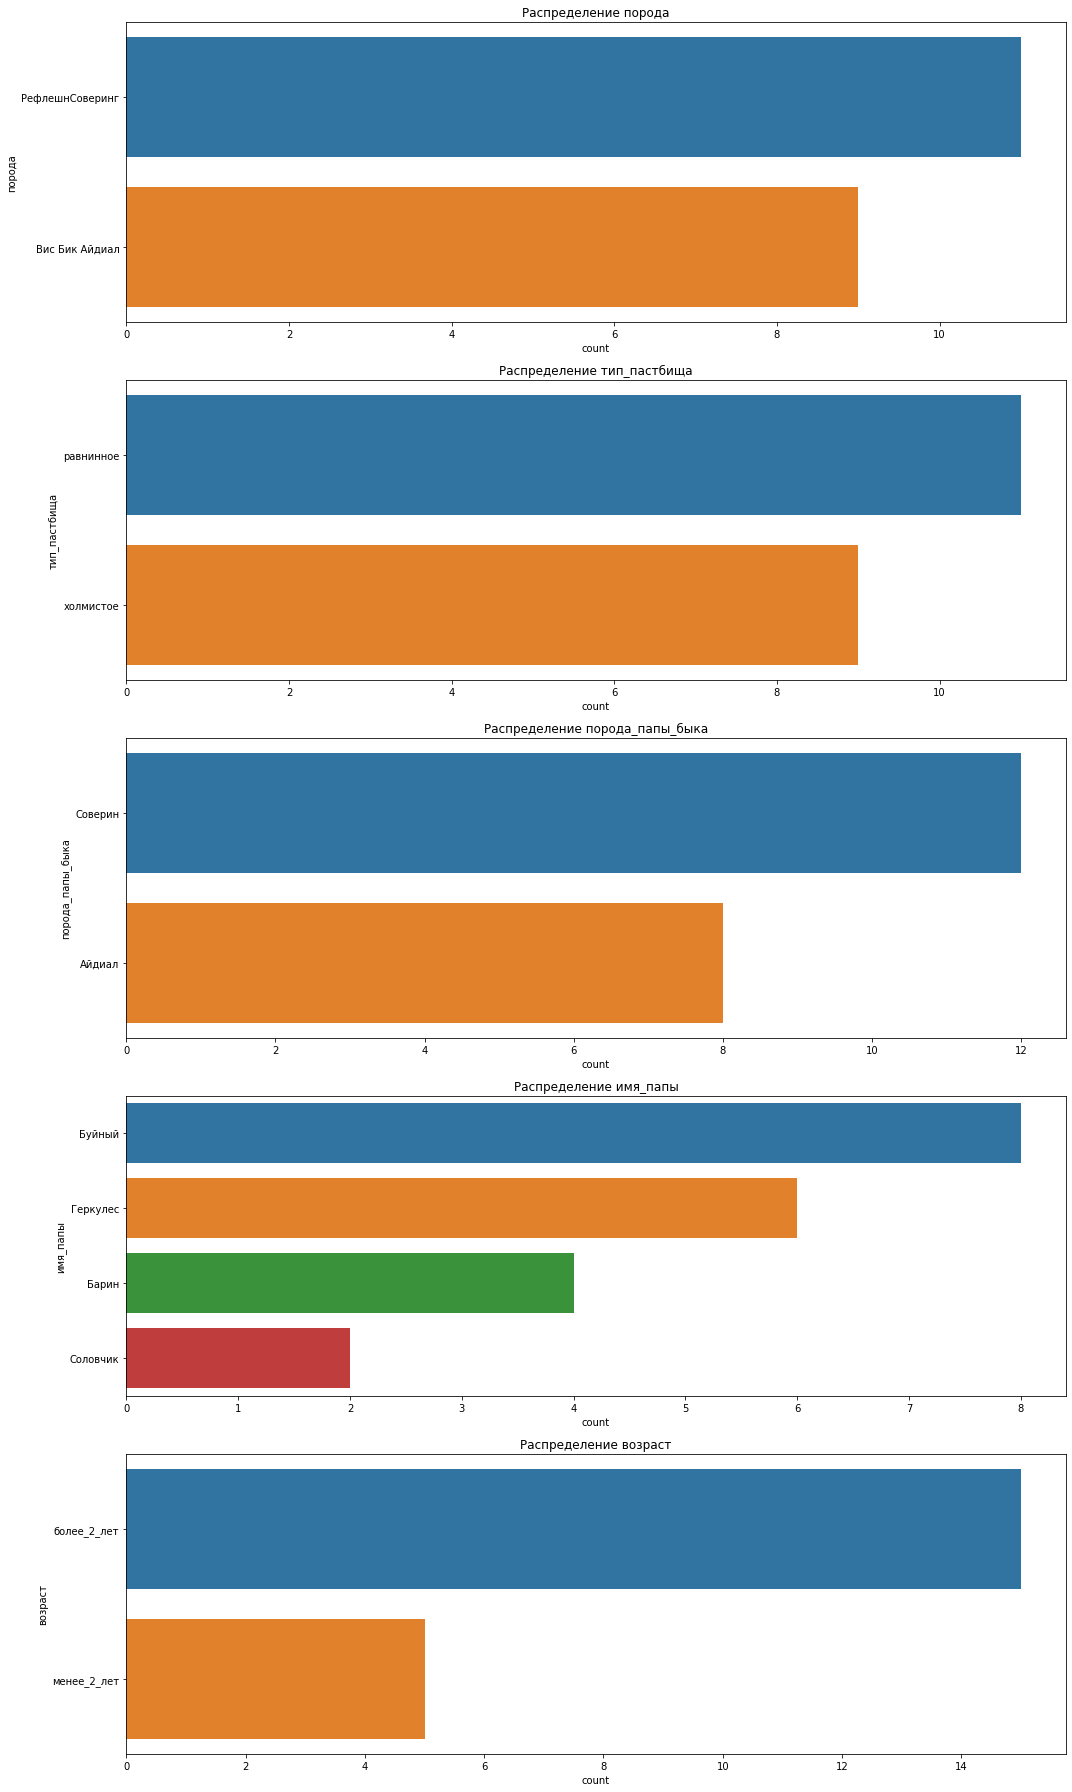

In [31]:
analys(cow_buy)

1) количественные показатели распредлены без явных выбросов. Так как мало значений не сказать какой тип распределения
2) Категориальные распределны равномерно за исключением возраста, также мало молодых иимя_папы. В имя_папы заменотни сильное отличие от распредления во втором датафрейме тут лидируют Буйный и Геркулес а там Барин, это может заметно повлиять на результат если присутвует кориляция от этого показателя.

Вывод по разделу
Анализируя данные в ferma : 
1)присутсвует выбросы в значении удой 1 знаечние 45500 что лежит далеко за границы усов. явная аномалия которую нужно удалть чтобы не исказился результат анализа. Также имеются вобросы в жирности (87 штук) и белке (5 штук), удалять их нестоит так они появляют на результат в жадьнейшем. Можно увелитить межквартильный размех с 1.5 до 3 тогда они войдут в интервал. Моеждт это связано с возрастом коровы
2) Распределение коллчественых признаков асиметрично кроме белка.
3) Качественные признаки равномерно на две категории кроме возраста, присутвует недостаток данных молодых коров
Анализируя данные в ferma_dad:
В данном датасете распредление отцов коров не ранвомерное Барин и Буйный отличаюся в 2 а то и 4 раза от Соловчика и Геркулеса рождаемостью.
Анализируя данные в fcow_buy
1) количественные показатели распредлены без явных выбросов. Так как мало значений не сказать какой тип распределения
2) Категориальные распределны равномерно за исключением возраста, также мало молодых иимя_папы. В имя_папы заменотни сильное отличие от распредления во втором датафрейме тут лидируют Буйный и Геркулес а там Барин, это может заметно повлиять на результат если присутвует кориляция от этого показателя.

# 4.Корреляционный анализ

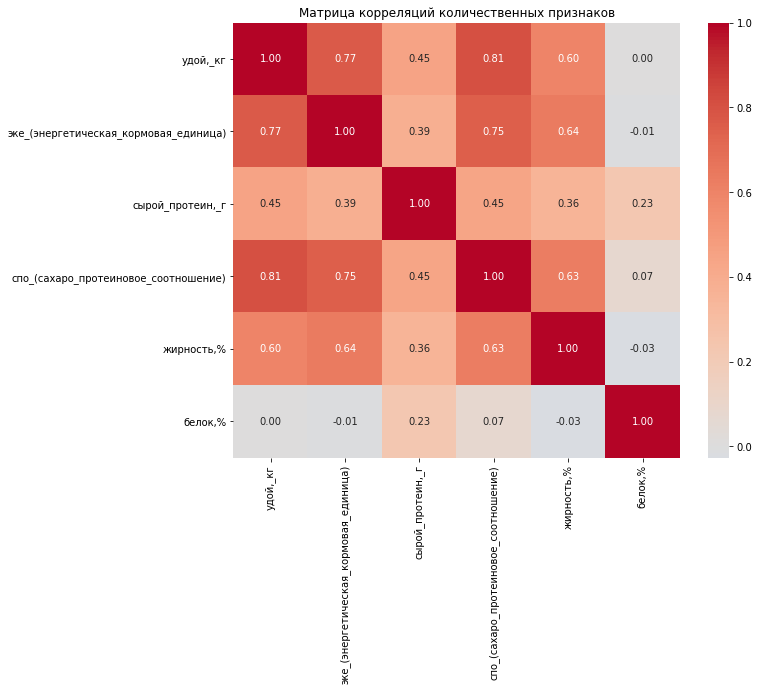

In [32]:
# Выбираем только количественные признаки, исключая 'id'
numeric_cols = ferma.select_dtypes(include=['float64', 'int64']).columns.drop('id')

# Если нужно убедиться, что столбец 'id' существует в данных
# numeric_cols = [col for col in ferma.select_dtypes(include=['float64', 'int64']).columns if col != 'id']

correlation_matrix = ferma[numeric_cols].corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Матрица корреляций количественных признаков")
plt.show()

Из матрицы корреляции видно:
1) Параметр удой.Удой  корелирует с СПО 0.81,  ЭКЕ 0.77 и жирностью 0.6.
2) Параметр ЭКЕ. ЭКЕ корелирует с удоем 0.77 и СПО 0.75 и жирностью 0.64
3) СПО. СПО корелирует с удоем 0.81, ЭКЕ 0.75 и жирностью 0.63
4) Жирность корелирует со всеми в диапазоне 0.6-0.63 кроме протеина и белка
5) Белок не корелирует с другими параемтрами

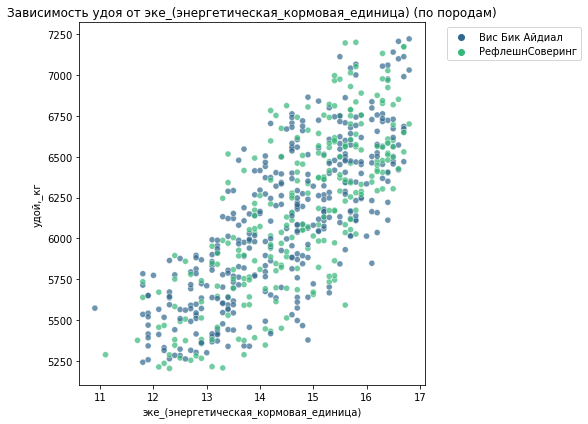

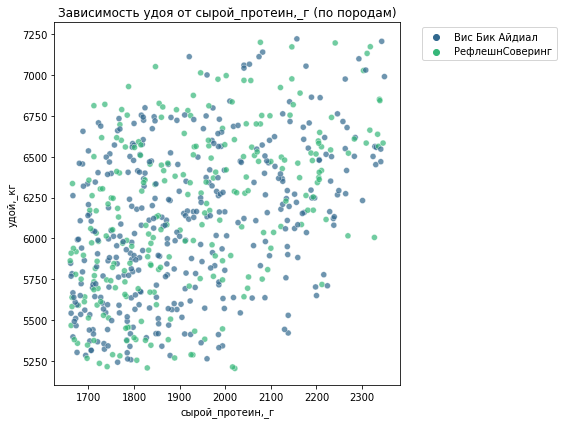

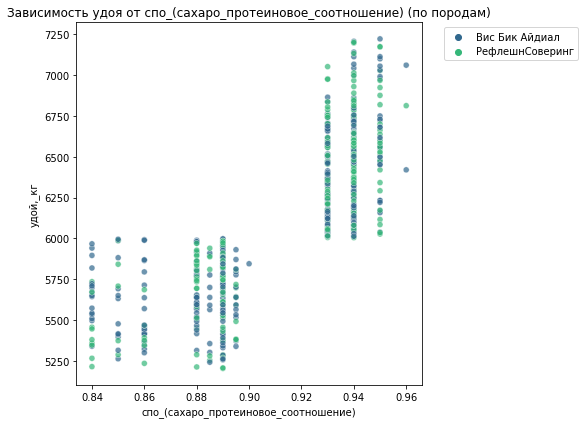

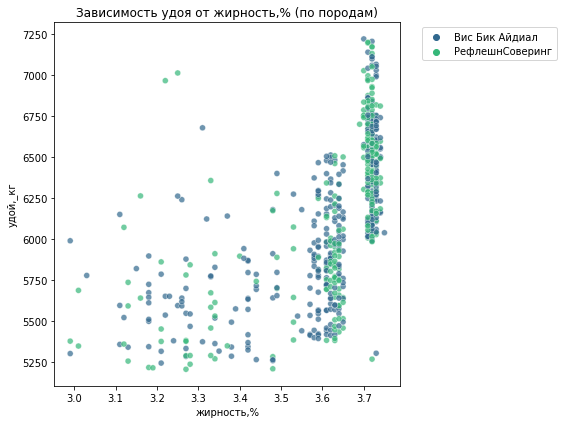

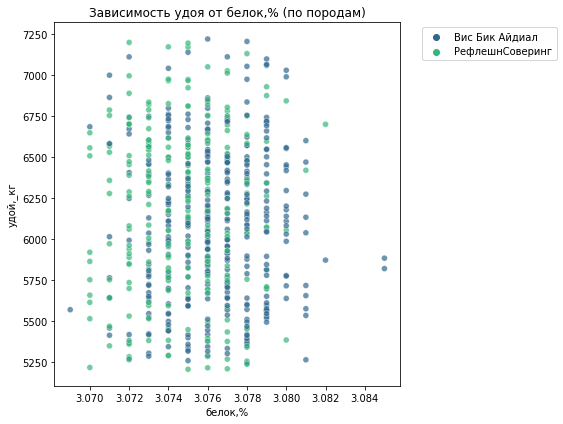

In [33]:
quantitative_features = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро_протеиновое_соотношение)', 'жирность,%', 'белок,%']
categorical_features = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

# Построение scatterplot для каждого количественного признака
for feature in quantitative_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=ferma,
        x=feature,
        y='удой,_кг',
        hue='порода',  # Цвет точек по категориальному признаку
        palette='viridis',
        alpha=0.7
    )
    plt.title(f"Зависимость удоя от {feature} (по породам)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
   

Присутвует линейная зависимость между удоем и ЭКЕ, есть нелинейная связь между удоем и СПО, удоем и жирностью Порода  влияет на тип зависимости

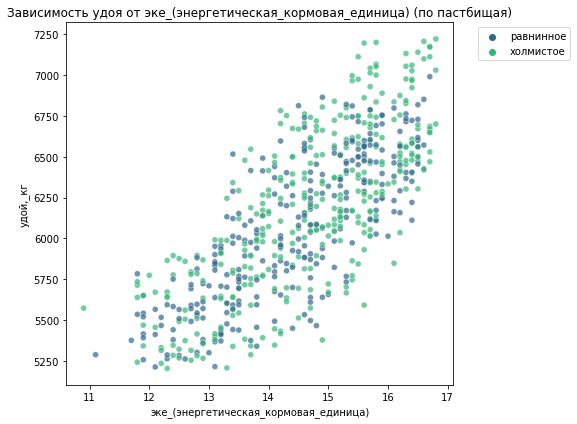

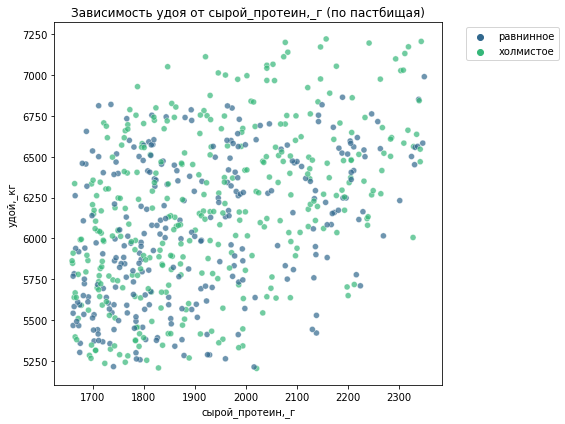

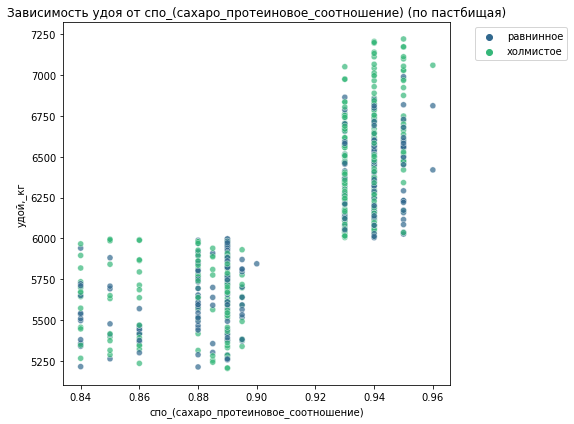

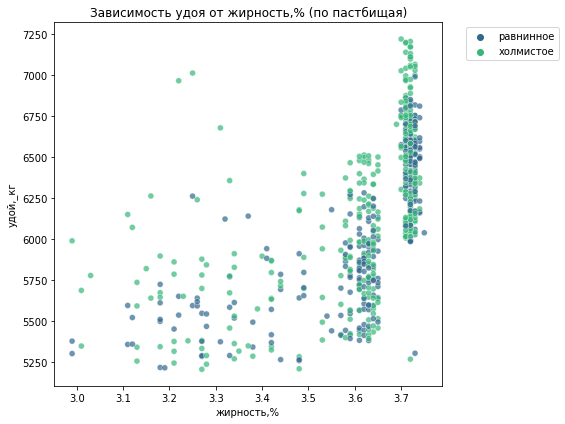

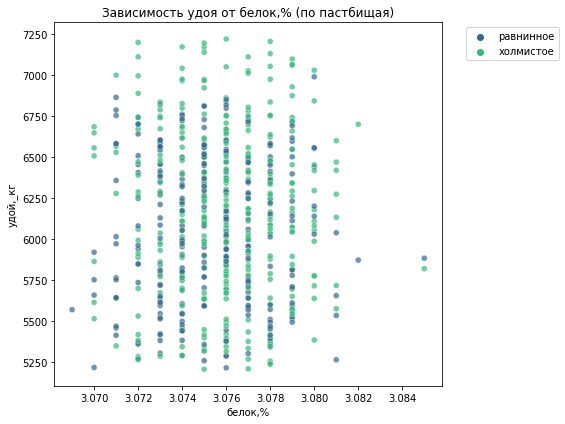

In [34]:

# Построение scatterplot для каждого количественного признака
for feature in quantitative_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=ferma,
        x=feature,
        y='удой,_кг',
        hue='тип_пастбища',  # Цвет точек по категориальному признаку
        palette='viridis',
        alpha=0.7
    )
    plt.title(f"Зависимость удоя от {feature} (по пастбищая)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
   

Тип пастбища также ка ки порода невлияют на тип зависимости между целевым и анализируемым признаком

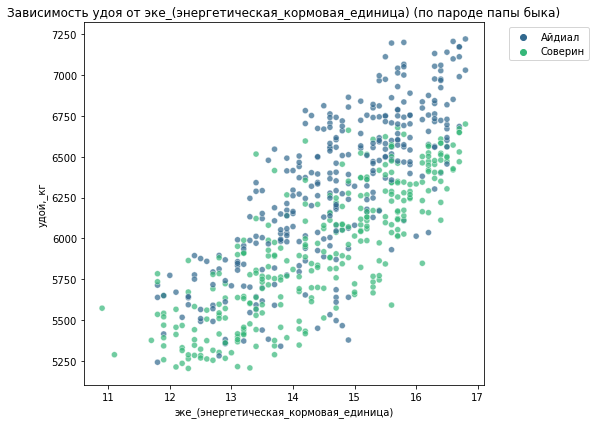

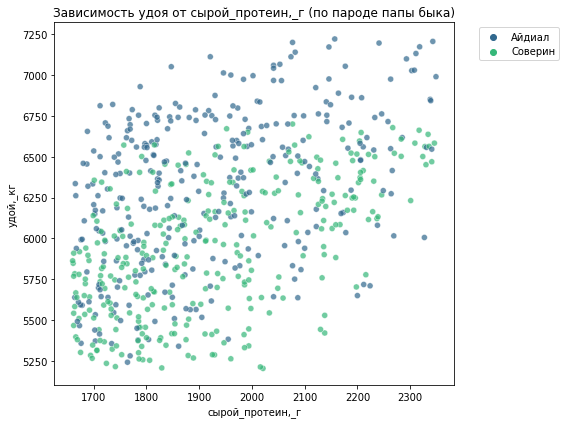

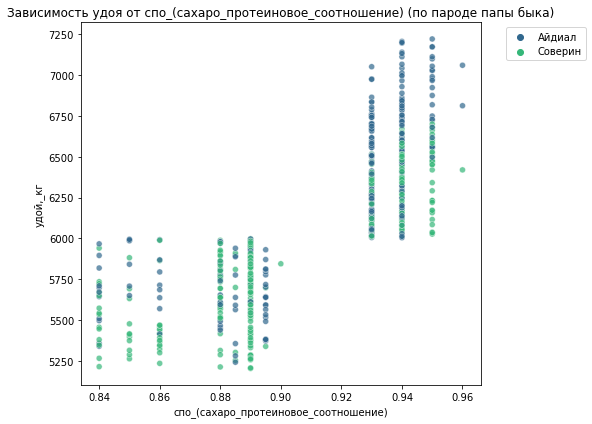

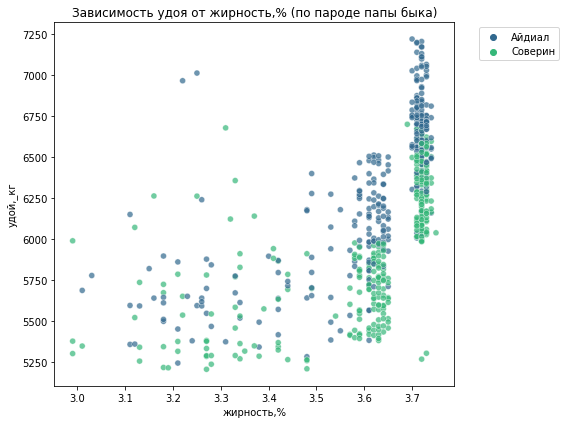

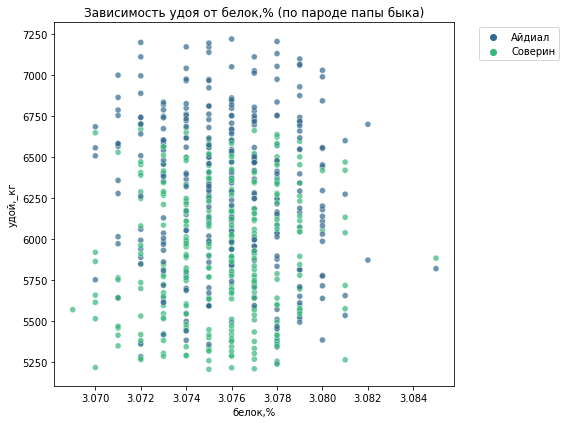

In [35]:


# Построение scatterplot для каждого количественного признака
for feature in quantitative_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=ferma,
        x=feature,
        y='удой,_кг',
        hue='порода_папы_быка',  # Цвет точек по категориальному признаку
        palette='viridis',
        alpha=0.7
    )
    plt.title(f"Зависимость удоя от {feature} (по пароде папы быка)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Парода папы быка влияет на тип и характер завиисомсти. первые два распрелделются равномерно в диапазоне значений, парода совейрин лежит ниже а айдиал выше что влияет на зависимость

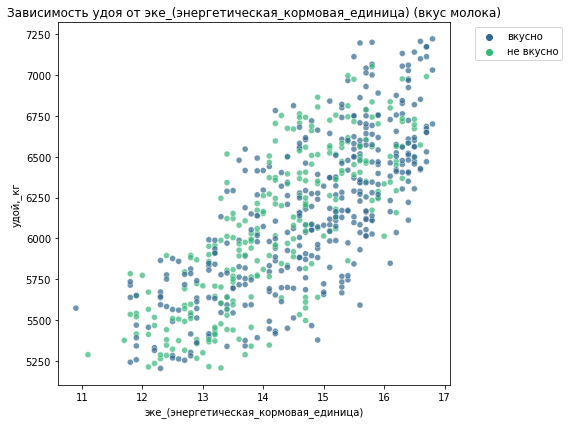

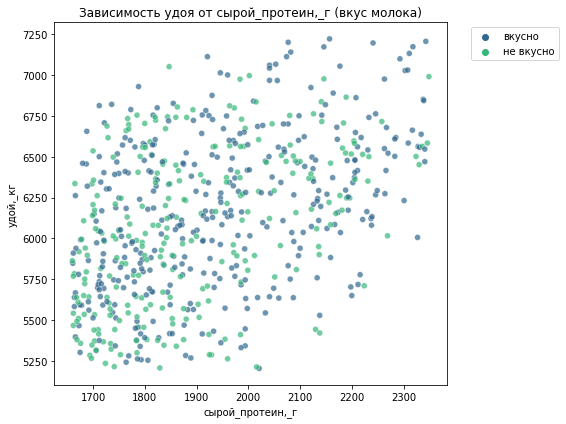

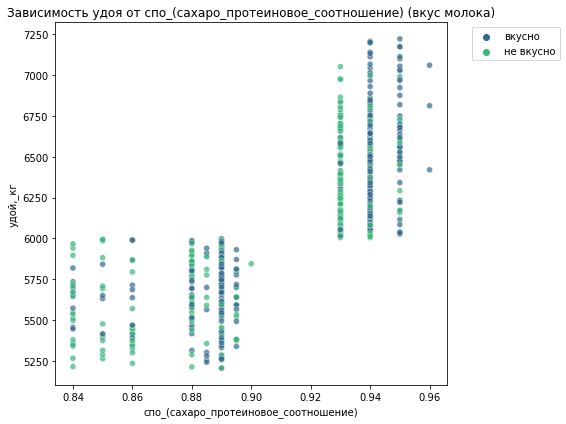

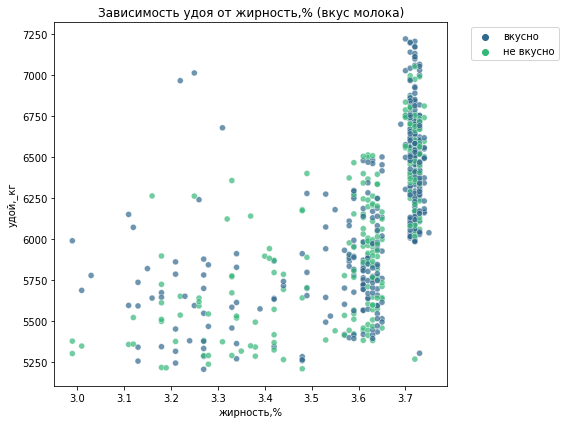

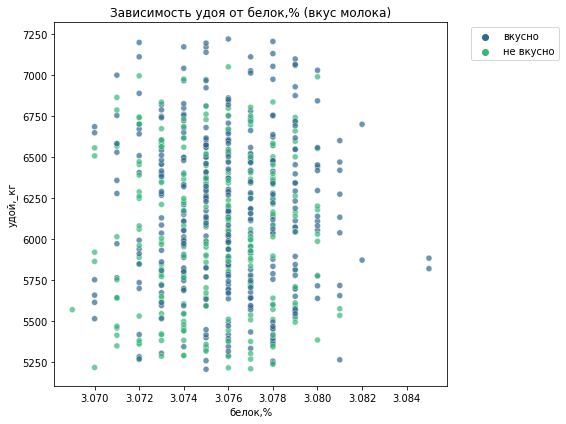

In [36]:

# Построение scatterplot для каждого количественного признака
for feature in quantitative_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=ferma,
        x=feature,
        y='удой,_кг',
        hue='вкус_молока',  # Цвет точек по категориальному признаку
        palette='viridis',
        alpha=0.7
    )
    plt.title(f"Зависимость удоя от {feature} (вкус молока)" )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Вкус молока невлияет на зависимость

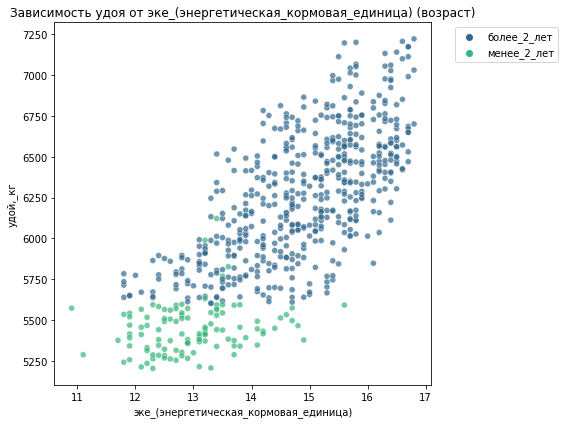

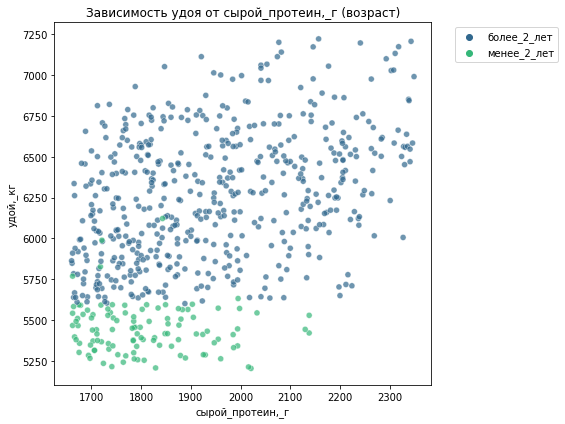

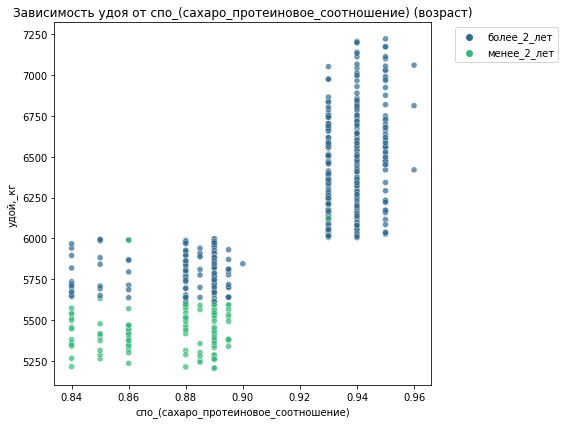

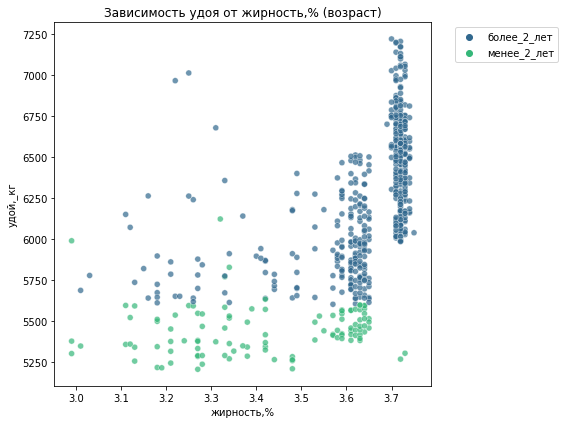

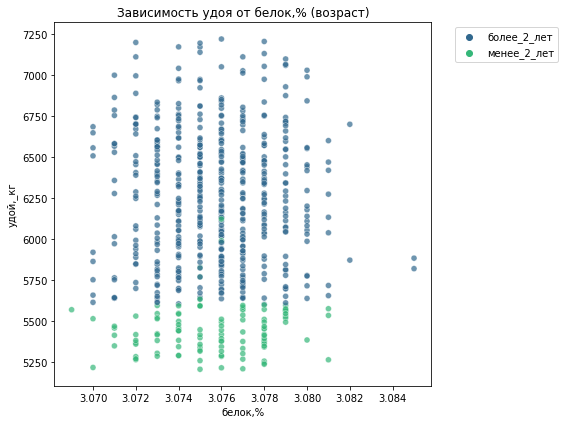

In [37]:

# Построение scatterplot для каждого количественного признака
for feature in quantitative_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=ferma,
        x=feature,
        y='удой,_кг',
        hue='возраст',  # Цвет точек по категориальному признаку
        palette='viridis',
        alpha=0.7
    )
    plt.title(f"Зависимость удоя от {feature} (возраст)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Возраст сильно влияет на зависимость удоя от параметров

Вывод по разделу:
Анализируя влияние категориальных апраметров на зависимость удоят от количественных можно заметить:
1) имеются линейная связь (или не совсем линейная) между удоем и ЭКЕ а также нелинйеная между удоем и СПО и Жирностью
2) Наблюдается мультиколинеарность между ЭКЕ, СПО и Жирностью 
3) В модели нужно учесть породу,возраст и породу отца 


<div class="alert alert-info"> <b>🎓 Вывод :</b> Анализируя влияние категориальных параметров на зависимость удоят от количественных можно заметить:
1) Имеются линейная квадратичная между удоем и ЭКЕ а также нелинйеная между удоем и СПО и Жирностью
2) Добавля в зависимости категориальные признаки порода,возраст и порода отца влияют на параметры зависимошсти поэтому их нужно учестьв  модели </div>

# 5.Обучение модели линейной регрессии

## 5.1 Модель 1


Вопрос. В предыдущем разделе мы оценивали влияние категориальнызх переменных на тип зависимостей и судя по структуре мы 5 раздел делаем на тех что оказывают влияние порода, порода папы и возраст. Или это просто инфа для проверки и делаем модель на все категориальные. Сделал и так и так. Для того  

R² модели: 0.781


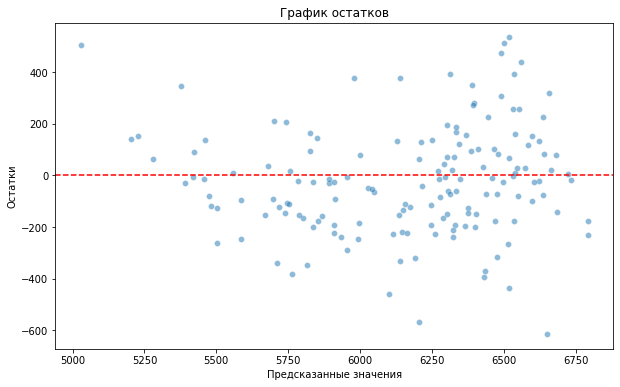

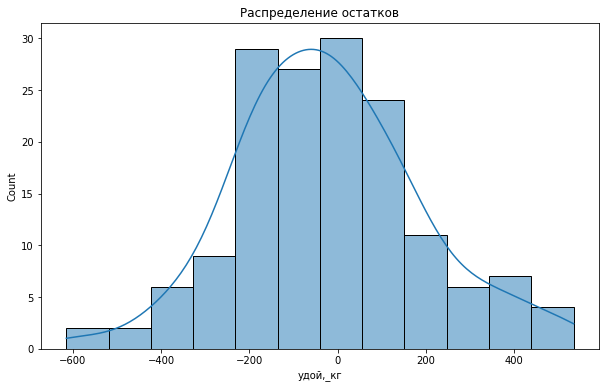

In [38]:
categorical_features = ['порода','порода_папы_быка','возраст']
quantitative_features = ['эке_(энергетическая_кормовая_единица)', 'спо_(сахаро_протеиновое_соотношение)', 'жирность,%','сырой_протеин,_г']
y = ferma['удой,_кг']
X = ferma[categorical_features+quantitative_features]
RANDOM_STATE=42
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

# OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Объединение с числовыми признаками
numeric_features = quantitative_features
encoded_feature_names = encoder.get_feature_names(categorical_features)
X_train_processed = pd.concat([
    pd.DataFrame(X_train_encoded, columns=encoded_feature_names),
    X_train[numeric_features].reset_index(drop=True)
], axis=1)


X_test_processed = pd.concat([
    pd.DataFrame(X_test_encoded, columns = encoded_feature_names),
    X_test[numeric_features].reset_index(drop=True)
], axis=1)

# StandardScaler
scaler = StandardScaler()
X_train_processed[numeric_features] = scaler.fit_transform(X_train_processed[numeric_features])
X_test_processed[numeric_features] = scaler.transform(X_test_processed[numeric_features])

# Обучение модели
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test_processed)
r2 = r2_score(y_test, y_pred)
print(f"R² модели: {r2:.3f}")

# Графики остатков
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")
plt.show()

Вывод R2 модели 0.781 что свидетельствует о том что модель не плохо предсказывает удой. Анализируя график остатков заметно что график смещен влево а не находится но 0 что говорит отом что модель рабоатет не коректно. Можно заменить модель, учесть выбросы либо добавить еще признаки

выросло и R2 и распределение остатков стало около 0

## 5.2модель 2

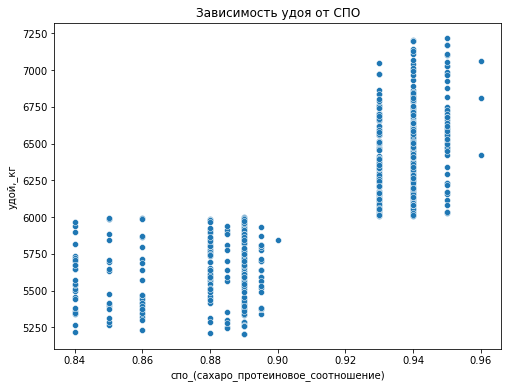

In [39]:
# Анализ диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ferma['спо_(сахаро_протеиновое_соотношение)'], y=ferma['удой,_кг'])
plt.title('Зависимость удоя от СПО')
plt.show()

# Определение границы кластеров (примерное значение)
spo_threshold = 0.9  # Граница между кластерами

# Преобразование в бинарный признак
ferma['спо_бинарный'] = (ferma['спо_(сахаро_протеиновое_соотношение)'] > spo_threshold).astype(int)

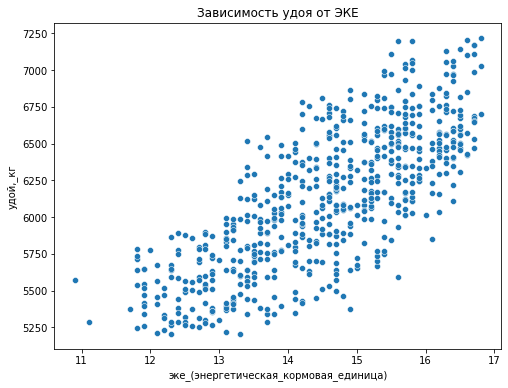

In [40]:
# Анализ диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ferma['эке_(энергетическая_кормовая_единица)'], y=ferma['удой,_кг'])
plt.title('Зависимость удоя от ЭКЕ')
plt.show()

# Добавление квадратичного признака
ferma['эке_квадрат'] = ferma['эке_(энергетическая_кормовая_единица)']**2

R² второй модели: 0.816


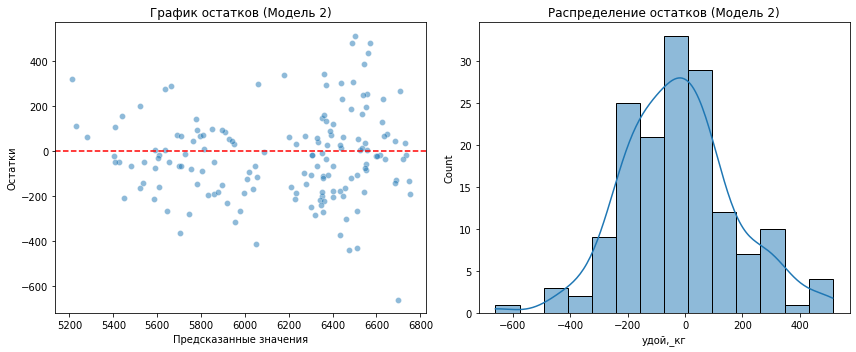

In [41]:
# Новый набор признаков
categorical_features_v2 = ['порода', 'порода_папы_быка', 'возраст','спо_бинарный']
numeric_features_v2 = ['эке_квадрат', 'жирность,%','сырой_протеин,_г']
RANDOM_STATE=42
X_v2 = ferma[numeric_features_v2 + categorical_features_v2]
y = ferma['удой,_кг']

# Разделение на train/test
X_train_v2, X_test_v2, y_train, y_test = train_test_split(X_v2, y, test_size=0.25, random_state=RANDOM_STATE)

# Кодирование категориальных признаков

encoder_v2 = OneHotEncoder(drop='first', sparse=False)
X_train_encoded_v2 = encoder_v2.fit_transform(X_train_v2[categorical_features_v2])
X_test_encoded_v2 = encoder_v2.transform(X_test_v2[categorical_features_v2])

# Объединение признаков
X_train_processed_v2 = pd.concat([
    pd.DataFrame(X_train_encoded_v2, columns=encoder_v2.get_feature_names(categorical_features_v2)),
    X_train_v2[numeric_features_v2].reset_index(drop=True)
], axis=1)

X_test_processed_v2 = pd.concat([
    pd.DataFrame(X_test_encoded_v2, columns=encoder_v2.get_feature_names(categorical_features_v2)),
    X_test_v2[numeric_features_v2].reset_index(drop=True)
], axis=1)

# Масштабирование
scaler_v2 = StandardScaler()
X_train_processed_v2[numeric_features_v2] = scaler_v2.fit_transform(X_train_processed_v2[numeric_features_v2])
X_test_processed_v2[numeric_features_v2] = scaler_v2.transform(X_test_processed_v2[numeric_features_v2])
# Обучение модели
model_v2 = LinearRegression()
model_v2.fit(X_train_processed_v2, y_train)

# Предсказание и оценка
y_pred_v2 = model_v2.predict(X_test_processed_v2)
r2_v2 = r2_score(y_test, y_pred_v2)
print(f"R² второй модели: {r2_v2:.3f}")

# Графики остатков
residuals_v2 = y_test - y_pred_v2

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_v2, y=residuals_v2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков (Модель 2)")

plt.subplot(1, 2, 2)
sns.histplot(residuals_v2, kde=True)
plt.title("Распределение остатков (Модель 2)")

plt.tight_layout()
plt.show()

R2 новой модели увеличилось до 0.816. Распредление остатков стало ближе к 0 но всеравно чуть левее

R2 новой модели увеличилось до 0.827. Распредление остатков тоже столо ближе к 0. Интересно что для этой модели если добавить все категориальные признаки распределние остатков станет нормальным

## 5.3 Модель 3

In [42]:
ferma_all = pd.merge(ferma, ferma_dad[['id', 'имя_папы']], on='id', how='left')
ferma_all.head(5)

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро_протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,спо_бинарный,эке_квадрат,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


R² третьей модели: 0.820


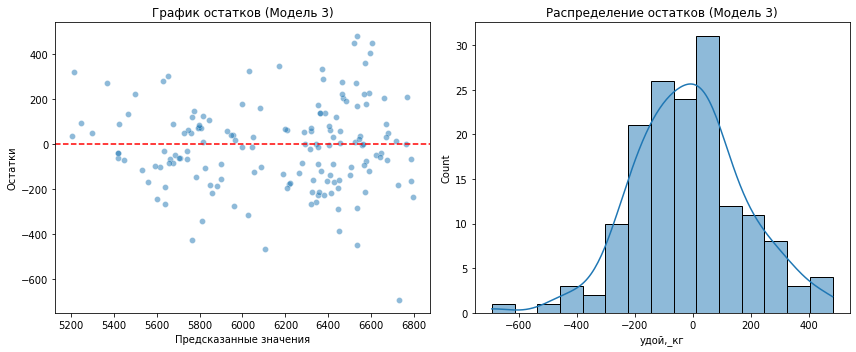

In [43]:
# Признаки для модели
categorical_features_v3 = ['порода', 'порода_папы_быка','возраст','имя_папы','спо_бинарный']
numeric_features_v3 = ['эке_квадрат', 'жирность,%','сырой_протеин,_г']


X_v3 = ferma_all[numeric_features_v3 + categorical_features_v3]
y = ferma_all['удой,_кг']

# Разделение на train/test
X_train_v3, X_test_v3, y_train, y_test = train_test_split(X_v3, y, test_size=0.25, random_state=42)

# Кодирование категориальных признаков
encoder_v3 = OneHotEncoder(drop='first', sparse=False)
X_train_encoded_v3 = encoder_v3.fit_transform(X_train_v3[categorical_features_v3])
X_test_encoded_v3 = encoder_v3.transform(X_test_v3[categorical_features_v3])

# Объединение с числовыми признаками
X_train_processed_v3 = pd.concat([
    pd.DataFrame(X_train_encoded_v3, columns=encoder_v3.get_feature_names(categorical_features_v3)),
    X_train_v3[numeric_features_v3].reset_index(drop=True)
], axis=1)

X_test_processed_v3 = pd.concat([
    pd.DataFrame(X_test_encoded_v3, columns=encoder_v3.get_feature_names(categorical_features_v3)),
    X_test_v3[numeric_features_v3].reset_index(drop=True)
], axis=1)

# Масштабирование
scaler_v3 = StandardScaler()
X_train_processed_v3[numeric_features_v3] = scaler_v3.fit_transform(X_train_processed_v3[numeric_features_v3])
X_test_processed_v3[numeric_features_v3] = scaler_v3.transform(X_test_processed_v3[numeric_features_v3])
#Обучение модели
model_v3 = LinearRegression()
model_v3.fit(X_train_processed_v3, y_train)

# Предсказание и оценка
y_pred_v3 = model_v3.predict(X_test_processed_v3)
r2_v3 = r2_score(y_test, y_pred_v3)
print(f"R² третьей модели: {r2_v3:.3f}")

# Графики остатков
residuals_v3 = y_test - y_pred_v3

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_v3, y=residuals_v3, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков (Модель 3)")

plt.subplot(1, 2, 2)
sns.histplot(residuals_v3, kde=True)
plt.title("Распределение остатков (Модель 3)")

plt.tight_layout()
plt.show()

R2 третьей моделт 0.820. Распределение остатков похоже на нормальное около 0

## 5.4 Сравнение метрик моделей

In [44]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Метрики для {model_name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.3f}\n")
    return mse, mae, rmse, r2

# Оценка всех моделей
metrics_v1 = evaluate_model(y_test, y_pred, "Модель 1 (базовая)")
metrics_v2 = evaluate_model(y_test, y_pred_v2, "Модель 2 (с преобразованиями)")
metrics_v3 = evaluate_model(y_test, y_pred_v3, "Модель 3 (с именем папы)")

Метрики для Модель 1 (базовая):
  MSE: 44624.76
  MAE: 165.20
  RMSE: 211.25
  R²: 0.781

Метрики для Модель 2 (с преобразованиями):
  MSE: 37474.11
  MAE: 150.04
  RMSE: 193.58
  R²: 0.816

Метрики для Модель 3 (с именем папы):
  MSE: 36575.96
  MAE: 148.74
  RMSE: 191.25
  R²: 0.820



In [45]:
# Ошибки на тренировочных данных
train_pred = model_v3.predict(X_train_processed_v3)
train_residuals = y_train - train_pred
# Квантили ошибок (95% доверительный интервал)
lower_bound = np.percentile(train_residuals, 2.5)
upper_bound = np.percentile(train_residuals, 97.5)

print(f"Доверительный интервал прогноза: [{lower_bound:.2f}, {upper_bound:.2f}] кг")

Доверительный интервал прогноза: [-342.39, 378.52] кг


Лучшей с точки зрения метрик обладает третья модель ( с преобразованием СПО в бинарную перемнную, и ЭКЕ в квадрате и добавлением имя папы)   у него меньше MSE(среднеквадратичная ошибка), MAE (Среднеабсолютная ошибка), RMSE (корень среднеквадратической ошибки) а также наибольший коэфициент детерминациию. Доверительный интервал или 95 % предсказываемых значений лежат в интервале от -342 до 378 кг

## 5.5 Прогноз удоя коров

In [46]:
# 1. Добавление недостающих признаков (средние значения +5%)
missing_features = {
    'эке_(энергетическая_кормовая_единица)': ferma['эке_(энергетическая_кормовая_единица)'].mean() * 1.05,
    'сырой_протеин,_г': ferma['сырой_протеин,_г'].mean() * 1.05,
    'спо_(сахаро_протеиновое_соотношение)': ferma['спо_(сахаро_протеиновое_соотношение)'].mean() * 1.05,
    }

for feature, value in missing_features.items():
    cow_buy[feature] = value

# 2. Преобразование признаков как при обучении модели
# Бинаризация СПО
spo_threshold = 0.9
cow_buy['спо_бинарный'] = (cow_buy['спо_(сахаро_протеиновое_соотношение)'] > spo_threshold).astype(int)

# Квадрат ЭКЕ
cow_buy['эке_квадрат'] = cow_buy['эке_(энергетическая_кормовая_единица)'] ** 2

# Переименование столбцов для совместимости
cow_buy = cow_buy.rename(columns={
    'текущая_жирность,%': 'жирность,%',
    'текущий_уровень_белок,%': 'белок,%'
})

# 3. Подготовка данных для модели
categorical_features = ['порода', 'порода_папы_быка', 'возраст', 'имя_папы','спо_бинарный']
numeric_features_for_scaling = ['эке_квадрат', 'жирность,%','сырой_протеин,_г']  # Признаки для масштабирования
all_numeric_features = numeric_features_for_scaling  # Все числовые признаки
# Кодирование категориальных признаков
X_cow_encoded = encoder_v3.transform(cow_buy[categorical_features])
X_cow_processed = pd.concat([
    pd.DataFrame(X_cow_encoded, columns=encoder_v3.get_feature_names(categorical_features)),
    cow_buy[all_numeric_features].reset_index(drop=True)
], axis=1)

# Масштабирование только нужных признаков
X_cow_processed[numeric_features_for_scaling] = scaler_v3.transform(X_cow_processed[numeric_features_for_scaling])

# 4. Прогнозирование удоя
cow_buy['прогноз_удоя_кг'] = model_v3.predict(X_cow_processed)

# 5. Добавление доверительного интервала (если определены границы)
if 'lower_bound' in locals() and 'upper_bound' in locals():
    cow_buy['удой_нижняя_граница'] = cow_buy['прогноз_удоя_кг'] + lower_bound
    cow_buy['удой_верхняя_граница'] = cow_buy['прогноз_удоя_кг'] + upper_bound
    result_cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст',
                  'прогноз_удоя_кг', 'удой_нижняя_граница', 'удой_верхняя_граница']
else:
    result_cols = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст', 'прогноз_удоя_кг']

# 6.
result = cow_buy[result_cols].round(1)

print("Прогноз удоя для новых коров:")
#print(result.sort_values('удой_нижняя_граница'))
display(result.query('прогноз_удоя_кг > 6000'))

Прогноз удоя для новых коров:


,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,прогноз_удоя_кг,удой_нижняя_граница,удой_верхняя_граница
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,6557.0,6214.6,6935.5
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,менее_2_лет,6380.4,6038.1,6759.0
2,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,6299.2,5956.8,6677.7
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,более_2_лет,6527.0,6184.6,6905.5
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,более_2_лет,6570.0,6227.6,6948.5
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,менее_2_лет,6430.9,6088.5,6809.4
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,6557.0,6214.6,6935.5
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,более_2_лет,6566.9,6224.5,6945.4
8,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,6299.2,5956.8,6677.7
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,менее_2_лет,6345.9,6003.5,6724.4


<div class="alert alert-info"> <b>🎓 Вывод </b> Прогнизируемый удой всех коров получился больше 6000. При этом есть коровы у которых удой с учетом нижней границы меньше 6000 это 2,8,10,13,16 

<div class="alert alert-info"> <b>🎓 Вывод по разделу</b> 1) Было проверено 3 линейных модели машинного обучения. По исходным данным, с преобразованием ЭКЕ в квадратную и СПО в бинарную бризнак, с добавлением признака имя папы
2)Лучшей с точки зрения метрик обладает третья модель ( с преобразованием СПО в бинарную перемнную, и ЭКЕ в квадрате и добавлением имя папы)   у него меньше MSE(среднеквадратичная ошибка), MAE (Среднеабсолютная ошибка), RMSE (корень среднеквадратической ошибки) а также наибольший коэфициент детерминациию. Доверительный интервал или 95 % предсказываемых значений лежат в интервале от -349 до 407 кг
3) По лучшей модели произведен прогноз удоя коров рассматриваемых для покупки.Прогнизируемый удой всех коров получился больше 6000. При этом есть коровы у которых удой с учетом нижней границы меньше 6000 это 2,8,10,13,16 

# 6 Обучение модели логистической регрессии

## 6.1 Модель логистической регрессии

In [47]:
ferma_all[numeric_features_v3 + categorical_features_v3+['вкус_молока']].sample(30)

,эке_квадрат,"жирность,%","сырой_протеин,_г",порода,порода_папы_быка,возраст,имя_папы,спо_бинарный,вкус_молока
157,213.16,3.59,1762,Вис Бик Айдиал,Айдиал,более_2_лет,Буйный,0,вкусно
605,249.64,3.70,2015,РефлешнСоверинг,Айдиал,более_2_лет,Буйный,1,не вкусно
626,190.44,3.64,1994,РефлешнСоверинг,Соверин,более_2_лет,Барин,0,вкусно
399,201.64,3.59,1877,РефлешнСоверинг,Соверин,более_2_лет,Барин,0,вкусно
131,193.21,3.73,2246,Вис Бик Айдиал,Соверин,более_2_лет,Барин,1,вкусно
284,237.16,3.22,2056,РефлешнСоверинг,Айдиал,более_2_лет,Буйный,1,вкусно
273,246.49,3.72,2221,РефлешнСоверинг,Соверин,более_2_лет,Барин,1,вкусно
418,198.81,3.61,2087,Вис Бик Айдиал,Айдиал,более_2_лет,Буйный,1,не вкусно
507,272.25,3.70,2123,РефлешнСоверинг,Соверин,более_2_лет,Соловчик,1,вкусно
520,166.41,3.72,1697,РефлешнСоверинг,Соверин,менее_2_лет,Барин,0,не вкусно


Accuracy: 0.592
Recall: 0.830
Precision: 0.598


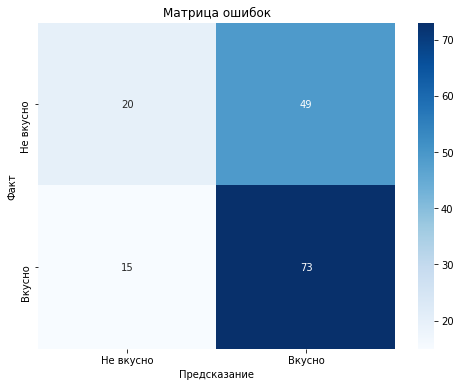

In [48]:
# 1. Подготовка целевой переменной (бинарная: 'вкусно' = 1, остальное = 0)
ferma_all['вкус_молока'] = ferma_all['вкус_молока'].map({'вкусно': 1, 'не вкусно': 0})

# 2. Выбор и преобразование признаков 
# Количественные признаки
ferma_all['жирность/белок'] = ferma_all['жирность,%'] / ferma_all['белок,%']                                            
categorical_features_v3 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']
numeric_features_v3  = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 
                        'спо_(сахаро_протеиновое_соотношение)','жирность,%','жирность/белок']
RANDOM_STATE=42
# 3. Разделение данных
X = ferma_all[numeric_features_v3 + categorical_features_v3]
y = ferma_all['вкус_молока']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

# 4. Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse=False).fit(ferma_all[categorical_features_v3])
X_train_encoded = encoder.fit_transform(X_train[categorical_features_v3])
X_test_encoded = encoder.transform(X_test[categorical_features_v3])

# 5. Масштабирование числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features_v3])
X_test_scaled = scaler.transform(X_test[numeric_features_v3])

# 6. Объединение признаков
X_train_processed = np.concatenate([X_train_encoded, X_train_scaled], axis=1)
X_test_processed = np.concatenate([X_test_encoded, X_test_scaled], axis=1)

# 7. Обучение модели
clf = LogisticRegression()
clf = clf.fit(X_train_processed, y_train)

# 8. Предсказание и оценка
y_pred = clf.predict(X_test_processed)

# Метрики качества
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Не вкусно', 'Вкусно'],
            yticklabels=['Не вкусно', 'Вкусно'])
plt.xlabel('Предсказание')
plt.ylabel('Факт')
plt.title('Матрица ошибок')
plt.show()

Для заказчика критичнее ошибка I рода, так как:
Покупка коровы с невкусным молоком (когда ожидали вкусное) приведет к прямым убыткам
Пропуск коровы с вкусным молоком (False Negative) менее критичен - это упущенная выгода, но не прямые потери.
Метрика Precision (точность) - важнее для заказчика, так как минимизирует False Positive
Recall менее критичен в данном 
Стандакртный порог медели 0.5 при ней Accuracy=0.592,Recall=0.83,Precision=0.598.
Так как нас интересует увеличение Precesion найдем порог при котором Precision будет больше 0.95.

## 6.2 Нахождение порога для увеличения Precision

In [49]:
# Получаем вероятности для положительного класса
y_probs = clf.predict_proba(X_test_processed)[:, 1]

# Строим precision-recall кривую
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Находим порог, где precision ≈ 1.0 (минимизируем False Positive)
optimal_idx = np.argmax(precisions >= 0.95)  # Желаемая точность 98%
optimal_threshold = thresholds[optimal_idx]

# Пересчитываем метрики с новым порогом
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)
new_precision = precision_score(y_test, y_pred_optimal)
new_recall = recall_score(y_test, y_pred_optimal)

print(f"Оптимальный порог: {optimal_threshold:.3f}")
print(f"Новые метрики: Precision = {new_precision:.3f}, Recall = {new_recall:.3f}")

Оптимальный порог: 0.770
Новые метрики: Precision = 0.950, Recall = 0.216


## 6.3 прогнозирование вкуса молока покупаемых коров

In [50]:
#  Подготовка данных для модели
cow_buy['жирность/белок'] = cow_buy['жирность,%'] / cow_buy['белок,%']     
categorical_features = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст','имя_папы']
numeric_features  = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 
                        'спо_(сахаро_протеиновое_соотношение)','жирность,%','жирность/белок']
# Подготовка новых данных
encoder = OneHotEncoder(drop='first', sparse=False).fit(cow_buy[categorical_features])
X_new_encoded = encoder.transform(cow_buy[categorical_features])
X_new_scaled = scaler.transform(cow_buy[numeric_features])
X_new_processed = np.concatenate([
    X_new_encoded,
    X_new_scaled,    
], axis=1)

# Прогнозирование с оптимальным порогом
optimal_threshold = 0.77 # Определен в ходе анализа precision-recall
probabilities = clf.predict_proba(X_new_processed)[:, 1]  # Вероятности класса 1
cow_buy['вероятность'] = probabilities
cow_buy['прогноз_вкуса'] = (probabilities >= optimal_threshold).astype(int)


# Вывод результатов
cow_buy.query('прогноз_вкуса == 1')


,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро_протеиновое_соотношение),спо_бинарный,эке_квадрат,прогноз_удоя_кг,удой_нижняя_граница,удой_верхняя_граница,жирность/белок,вероятность,прогноз_вкуса
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6527.002071,6184.611774,6905.522011,1.110748,0.787694,1
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6320.157366,5977.767069,6698.677305,1.220949,0.784975,1
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6069.363493,5726.973195,6447.883432,1.112195,0.817967,1
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6527.002071,6184.611774,6905.522011,1.109299,0.788865,1
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6320.157366,5977.767069,6698.677305,1.211432,0.792650,1


Вывод: Применив модель логестической регрессии данных ferma_all для рассматриваемых к покупке коров cow_buy получили что вкусное молоко у пяти коров 3,10,13,15,16. Так как признак белок не особо изменялся заменил его на отношение жиров к белкам 

Выводы по разделу: Настроили и обучили модель логистической регрессии для определения вкуса молока, сначало обучили модель на выборке ferma_all с разбивкой на тренировочную и тестовую. Получили ошибки 1 и второго рода. Для заказчика критичнее ошибка I рода, так как: Покупка коровы с невкусным молоком (когда ожидали вкусное) приведет к прямым убыткам
Пропуск коровы с вкусным молоком (False Negative) менее критичен - это упущенная выгода, но не прямые потери.
Метрика Precision (точность) - важнее для заказчика, так как минимизирует False Positive
Recall менее критичен в данном  Стандартный порог медели 0.5 при ней Accuracy=0.592,Recall=0.83,Precision=0.598.
Так как нас интересует увеличение Precesion нашли порог = 0.77 при котором Precision будет больше 0.95.
Применив модель логестической регрессии данных ferma_all для рассматриваемых к покупке коров cow_buy получили что вкусное молоко у пяти коров 3,10,13,15,16. Так как признак белок не особо изменялся заменил его на отношение жиров к белкам 

# 7.Итоговые выводы

In [51]:
# выберем строки где прогноз удоя больше 6000 кг в год и вкусное молоко
cow_buy[(cow_buy['прогноз_удоя_кг'] > 6000)&(cow_buy['прогноз_вкуса'] == 1)]

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро_протеиновое_соотношение),спо_бинарный,эке_квадрат,прогноз_удоя_кг,удой_нижняя_граница,удой_верхняя_граница,жирность/белок,вероятность,прогноз_вкуса
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6527.002071,6184.611774,6905.522011,1.110748,0.787694,1
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6320.157366,5977.767069,6698.677305,1.220949,0.784975,1
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6069.363493,5726.973195,6447.883432,1.112195,0.817967,1
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6527.002071,6184.611774,6905.522011,1.109299,0.788865,1
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6320.157366,5977.767069,6698.677305,1.211432,0.792650,1


In [52]:
# выберем строки где нижняя граница удоя больше 6000 кл в год и вкусное молоко
cow_buy[(cow_buy['удой_нижняя_граница'] > 5940)&(cow_buy['вероятность'] >= 0.73)]

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро_протеиновое_соотношение),спо_бинарный,эке_квадрат,прогноз_удоя_кг,удой_нижняя_граница,удой_верхняя_граница,жирность/белок,вероятность,прогноз_вкуса
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6557.008505,6214.618207,6935.528444,1.163849,0.743864,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6527.002071,6184.611774,6905.522011,1.110748,0.787694,1
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6557.008505,6214.618207,6935.528444,1.163849,0.743864,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6345.924762,6003.534465,6724.444702,1.104255,0.750976,0
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6320.157366,5977.767069,6698.677305,1.220949,0.784975,1
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6527.002071,6184.611774,6905.522011,1.109299,0.788865,1
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6320.157366,5977.767069,6698.677305,1.211432,0.792650,1
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6525.682899,6183.292602,6904.202838,1.088302,0.731146,0


In [53]:
# выберем строки где нижняя граница удоя больше 6000 кл в год и вкусное молоко
cow_buy[(cow_buy['удой_нижняя_граница'] > 5940)&(cow_buy['прогноз_вкуса'] == 1)]

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро_протеиновое_соотношение),спо_бинарный,эке_квадрат,прогноз_удоя_кг,удой_нижняя_граница,удой_верхняя_граница,жирность/белок,вероятность,прогноз_вкуса
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6527.002071,6184.611774,6905.522011,1.110748,0.787694,1
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6320.157366,5977.767069,6698.677305,1.220949,0.784975,1
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6527.002071,6184.611774,6905.522011,1.109299,0.788865,1
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6320.157366,5977.767069,6698.677305,1.211432,0.792650,1


<div class="alert alert-info"> <b>🎓 Вывод </b> 
под требования фермера прогноз удоя больше 6000 кг в год и вкусное молоко попадает пять коров 3,10,13,15,16, при этом есть риски т.к.удой имеет границы доверительно интервала с достаточной увереностью можно прогнозировать по нижней границе удоя с запасом 10% 5940 и вкусным молоком таких коров уже четыре 3,10,15,16. Вообще если взять 10% погрешность на удой и 5% на вкус получится 8 коров смотря какую бизнес задачу ставит фермер. Если выбрать с наименьшими рисками коров с удоем и вкусом то выбить по нижней границе удоя и вкусу с разделением 0.77, если риски увеличить 

Выводы о моделях
Линейная регрессия: Плюсы - Простота, интерпретируемость	Минусы - Чувствительна к выбросам и коллинеарности
Логистическая регрессия	Плюсы -Хороша для бинарной классификации	Минусы - Низкая точность при слабых признаках
Способы улучшения моделей
Для линейной регрессии:
Добавление полиномиальных признаков (например, жирность²).
Использование Lasso/Ridge-регрессии для борьбы с переобучением.
Для логистической регрессии:
Балансировка классов (class_weight='balanced').
Подбор порога классификации через precision-recall curve.

Можно ли улучшить результаты?
Да, если:
Есть больше данных (особенно по коровам с удоем >6000 кг).

Важные метрики для анализа рисков
Precision (точность):
"Какой % коров, которые модель назвала вкусными, таковы на самом деле?"
Критично, если фермер теряет деньги на невкусном молоке.
Recall (полнота):
"Какой % всех вкусных коров модель нашла?"
Важно, если фермеру нужно максимизировать сбор вкусного молока.




# Полный вывод по проекту:
Первый этап загрузка данных: Для анализа представленны три датафрейма первый с 634 строками данным по коровам фермера, второй со 629 строками по отцам коров фермера и третий 20 строк с данынми по коровам для покупок. Названия столбцов приведены к нижнему регистру а также исправленны типы данных в 1 и 3 датафреймах в столбцах с численными знаечниями
Второй этап предобработк аданных: В данном раздела была произведена проверка на пропуски которых не оказалось и на будикаты. Было найдено 5 полных дубликатов в датафрейме ferma и 5 в cow_buy. Также была произведена проверка на неявные дубликаты по столбку id в первом и втором датафреме, дубликаты не были найдены. Произведен поиск и замена неявных дубликатов в категориальных переменных.Замена типа данных была произведена в первом разедле так как она сильно бросилась в галаз при первичном анализе не заню критично ли это.
Третий этап Исследователький анализ данных: Анализируя данные в ferma : 
1)присутсвует выбросы в значении удой 1 знаечние 45500 что лежит далеко за границы усов. явная аномалия которую нужно удалть чтобы не исказился результат анализа. Также имеются вобросы в жирности (87 штук) и белке (5 штук), удалять их нестоит так они появляют на результат в жадьнейшем. Можно увелитить межквартильный размех с 1.5 до 3 тогда они войдут в интервал. Моеждт это связано с возрастом коровы
2) Распределение коллчественых признаков асиметрично кроме белка.
3) Качественные признаки равномерно на две категории кроме возраста, присутвует недостаток данных молодых коров
Анализируя данные в ferma_dad:
В данном датасете распредление отцов коров не ранвомерное Барин и Буйный отличаюся в 2 а то и 4 раза от Соловчика и Геркулеса рождаемостью.
Анализируя данные в fcow_buy
1) количественные показатели распредлены без явных выбросов. Так как мало значений не сказать какой тип распределения
2) Категориальные распределны равномерно за исключением возраста, также мало молодых иимя_папы. В имя_папы заменотни сильное отличие от распредления во втором датафрейме тут лидируют Буйный и Геркулес а там Барин, это может заметно повлиять на результат если присутвует кориляция от этого показателя. 
Четвертый этап: Корреляционный анализ: 
Анализируя влияние категориальных апраметров на зависимость удоят от количественных можно заметить:
1) имеются линейная связь (или не совсем линейная) между удоем и ЭКЕ а также нелинйеная медлу удоем и СПО и Жирностью
2) Наблюдается мультиколинеарность между ЭКЕ, СПО и Жирностью 
3) В модели нужно учесть породу,возраст и породу отца 
Пятый этап Обучение модели линейной регрессии: 1) Было проверено 3 линейных модели машинного обучения. По исходным данным, с преобразованием ЭКЕ в квадратную и СПО в бинарную бризнак, с добавлением признака имя папы
2)Лучшей с точки зрения метрик обладает третья модель ( с преобразованием СПО в бинарную перемнную, и ЭКЕ в квадрате и добавлением имя папы)   у него меньше MSE(среднеквадратичная ошибка), MAE (Среднеабсолютная ошибка), RMSE (корень среднеквадратической ошибки) а также наибольший коэфициент детерминациию. Доверительный интервал или 95 % предсказываемых значений лежат в интервале от -349 до 407 кг
3) По лучшей модели произведен прогноз удоя коро рассматриваемых для покупки. Рекомендуется покупка коров у которых нижний порог больше 6000 это номера 0,1,3,4,5,7,9,11,12,15,17,18. Из анализа можно сделать вывод что более удоистыми являются порода Рефлешн Соверинг, с равнинным типом пастбища, возрастом более двух лет, с отцом Буйный, хотя из анализа было видно что в  данных Буйвола больше в 2 раза чем Геркулес. Порода папы  не принципиально.
Шестой этап Обучение модели логистической регрессии: Настроили и обучили модель логистической регрессии для определения вкуса молока, сначало обучили модель на выборке ferma_all с разбивкой на тренировочную и тестовую. Получили ошибки 1 и второго рода. Для заказчика критичнее ошибка I рода, так как: Покупка коровы с невкусным молоком (когда ожидали вкусное) приведет к прямым убыткам
Пропуск коровы с вкусным молоком (False Negative) менее критичен - это упущенная выгода, но не прямые потери.
Метрика Precision (точность) - важнее для заказчика, так как минимизирует False Positive
Recall менее критичен в данном  Стандартный порог медели 0.5 при ней Accuracy=0.592,Recall=0.83,Precision=0.598.
Так как нас интересует увеличение Precesion нашли порог = 0.77 при котором Precision будет больше 0.95.
Применив модель логестической регрессии данных ferma_all для рассматриваемых к покупке коров cow_buy получили что вкусное молоко у пяти коров 3,10,13,15,16. Так как признак белок не особо изменялся заменил его на отношение жиров к белкам 
Седьмой этап вывод по анализу покупаемых коров:под требования фермера попает только две коровы у которых с учетом погрешности расчета удоя которая учтена в определении нижней границы удоя больше 6000 кг в год, при этом будет вкусное молоко это коровы породы Соверинг № 3 и 15 с рочень похожими параметрами. В качестве альтернативы можно предложить еще два немного рисковых варианта с нижней границей удоя 5977 и прогнозируемым удоем 6320 это коровы № 10 и 16
